<a href="https://colab.research.google.com/github/mameaicha/Projet_streamlit_Iris/blob/main/Deep_Neural_Network_Checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Import your dataset and perform initial analysis and visualization

In [70]:
%%capture
!pip install sweetviz

In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
%matplotlib inline
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from itertools import product
import seaborn as sns
import plotly.express as px
import missingno as msno # for missing data
import sweetviz as sv #Sweetviz Library for EDA

from sklearn.model_selection import train_test_split
# Preprocessing Data
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import   StandardScaler, OneHotEncoder
#from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score,roc_auc_score, roc_curve,classification_report


#deep learning
from __future__ import print_function
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import tensorflow as tf
import torch as tch


In [115]:
url = 'https://drive.google.com/u/0/uc?id=1kVnOzZ84avAAY1mA2I_Oh6FH3UPEb-_3&export=download'
#data = pd.read_csv(url, index_col=0, encoding = "ISO-8859-1")
data = pd.read_csv(url, encoding = "ISO-8859-1")

In [116]:
# make a copy
df = data.copy()

#### Analyse de forme




In [5]:
df.shape

(11162, 17)

In [6]:
# columns names
print(df.columns.values)

['age' 'job' 'marital' 'education' 'default' 'balance' 'housing' 'loan'
 'contact' 'day' 'month' 'duration' 'campaign' 'pdays' 'previous'
 'poutcome' 'deposit']


- Description des attributs:
  - variables d'entrées:
    - caractéristiques du client:
      - age
      -job (type d'emploi)
      -marital (statut matrimonial)
      -education
      -default (a un crédit en défaut? 'no','yes','unknown')
      -balance
      -housing (dispose d'un prêt immobilier?'no','yes','unknown')
      -loan (a un prêt personnel?'no','yes','unknown')
    - A propos de la campagne en cours
      - contact (type de communication: 'cellular','telephone')
      - duration (la durée du dernier contact, en secondes)
      - day (dernier jour de contact de la semaine)
      - month (dernier contact mois de l'année)
      - campaign (nombre de contacts réalisés au cours de cette campagne et pour ce client)
   - A propos des contacts antérieurs/campagne:
     - pdays (nombre de jours écoulés depuis que le client a été contacté pour la dernière fois dans le cadre d'une campagne précédente)
     - previous (nombre de contacts effectués avant cette campagne et pour ce client)
     - poutcome (les résultats de la campagne de marketing précédente: 'failure','nonexistent','success')
 - Variable de sortie (cible souhaitée):
    - deposit (le client a-t-il souscrit un dépôt à terme?'yes','no')



In [7]:
# print header of dataframe
df.head(10).T

0          1           2          3         4           5  \
age               59         56          41         55        54          42   
job           admin.     admin.  technician   services    admin.  management   
marital      married    married     married    married   married      single   
education  secondary  secondary   secondary  secondary  tertiary    tertiary   
default           no         no          no         no        no          no   
balance         2343         45        1270       2476       184           0   
housing          yes         no         yes        yes        no         yes   
loan              no         no          no         no        no         yes   
contact      unknown    unknown     unknown    unknown   unknown     unknown   
day                5          5           5          5         5           5   
month            may        may         may        may       may         may   
duration        1042       1467        1389        579       673         562   
campaign           1          1           1          1         2           2   
pdays             -1         -1          -1         -1        -1          -1   
previous           0          0           0          0         0           0   
poutcome     unknown    unknown     unknown    unknown   unknown     unknown   
deposit          yes        yes         yes        yes       yes         yes   

                    6          7           8          9  
age                56         60          37         28  
job        management    retired  technician   services  
marital       married   divorced     married     single  
education    tertiary  secondary   secondary  secondary  
default            no         no          no         no  
balance           830        545           1       5090  
housing           yes        yes         yes        yes  
loan              yes         no          no         no  
contact       unknown    unknown     unknown    unknown  
day                 6          6           6          6  
month             may        may         may        may  
duration         1201       1030         608       1297  
campaign            1          1           1          3  
pdays              -1         -1          -1         -1  
previous            0          0           0          0  
poutcome      unknown    unknown     unknown    unknown  
deposit           yes        yes         yes        yes

In [8]:
#types of variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [9]:
df.dtypes.value_counts()

object    10
int64      7
dtype: int64

######  Classification ou la reclassification des variables selon leur type ou leur fonction

In [10]:

#classification or reclassification of variables according to type or function:
# view on https://www.kaggle.com/code/ozlemilgun/the-prediction-of-titanic-passengers-survival

def grab_col_names(dataframe, cat_th=5, car_th=20):
    """
    This function to perform the selection of numeric and categorical variables in the data set in a parametric way.
    Note: Variables with numeric data type but with categorical properties are included in categorical variables.

    Parameters
    ----------
    dataframe: dataframe
        The data set in which Variable types need to be parsed
    cat_th: int, optional
        The threshold value for number of distinct observations in numerical variables with categorical properties.
        cat_th is used to specify that if number of distinct observations in numerical variable is less than
        cat_th, this variables can be categorized as a categorical variable.

    car_th: int, optional
        The threshold value for categorical variables with  a wide range of cardinality.
        If the number of distinct observations in a categorical variables is greater than car_th, this
        variable can be categorized as a categorical variable.

    Returns
    -------
        cat_cols: list
            List of categorical variables.
        num_cols: list
            List of numerical variables.
        cat_but_car: list
            List of categorical variables with  a wide range of cardinality.

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))

    Notes
    ------
        Sum of elements in lists the cat_cols,num_cols  and  cat_but_car give the total number of variables in dataframe.
    """

    # cat cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].dtypes != "O" and
                   dataframe[col].nunique() < cat_th]

    cat_but_car = [col for col in dataframe.columns if dataframe[col].dtypes == "O" and
                   dataframe[col].nunique() > car_th]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O" and "ID" not in col.upper()]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    return cat_cols,num_cols,cat_but_car


In [11]:
grab_col_names(df)

(['job',
  'marital',
  'education',
  'default',
  'housing',
  'loan',
  'contact',
  'month',
  'poutcome',
  'deposit'],
 ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'],
 [])

In [12]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

###### Recherche des données manquantes

In [13]:
#checking for duplicated rows and missing values
print(df.duplicated().sum())
print(df.isnull().sum().sum())

0
0


In [14]:
# Printing unique values in data
for col in df.columns:
  print(f'{col :-<30} {df[col].unique()}')
    #print('unique values in "{}":\n'.format(i),df[i].unique())

age--------------------------- [59 56 41 55 54 42 60 37 28 38 30 29 46 31 35 32 49 43 26 40 33 23 48 45
 36 52 53 39 57 51 44 24 50 27 34 47 25 58 61 68 75 22 69 66 85 72 90 67
 71 21 74 65 62 83 70 76 77 19 73 63 20 78 95 64 79 82 18 86 84 87 92 81
 80 93 88 89]
job--------------------------- ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
marital----------------------- ['married' 'single' 'divorced']
education--------------------- ['secondary' 'tertiary' 'primary' 'unknown']
default----------------------- ['no' 'yes']
balance----------------------- [2343   45 1270 ... 1594 2593 -134]
housing----------------------- ['yes' 'no']
loan-------------------------- ['no' 'yes']
contact----------------------- ['unknown' 'cellular' 'telephone']
day--------------------------- [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24  1 10 22 25 31]
month-------------------

In [117]:
#Missing Values
df = df.replace('unknown', np.NaN)
df.isna().sum()

age             0
job            70
marital         0
education     497
default         0
balance         0
housing         0
loan            0
contact      2346
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     8326
deposit         0
dtype: int64

<Axes: >

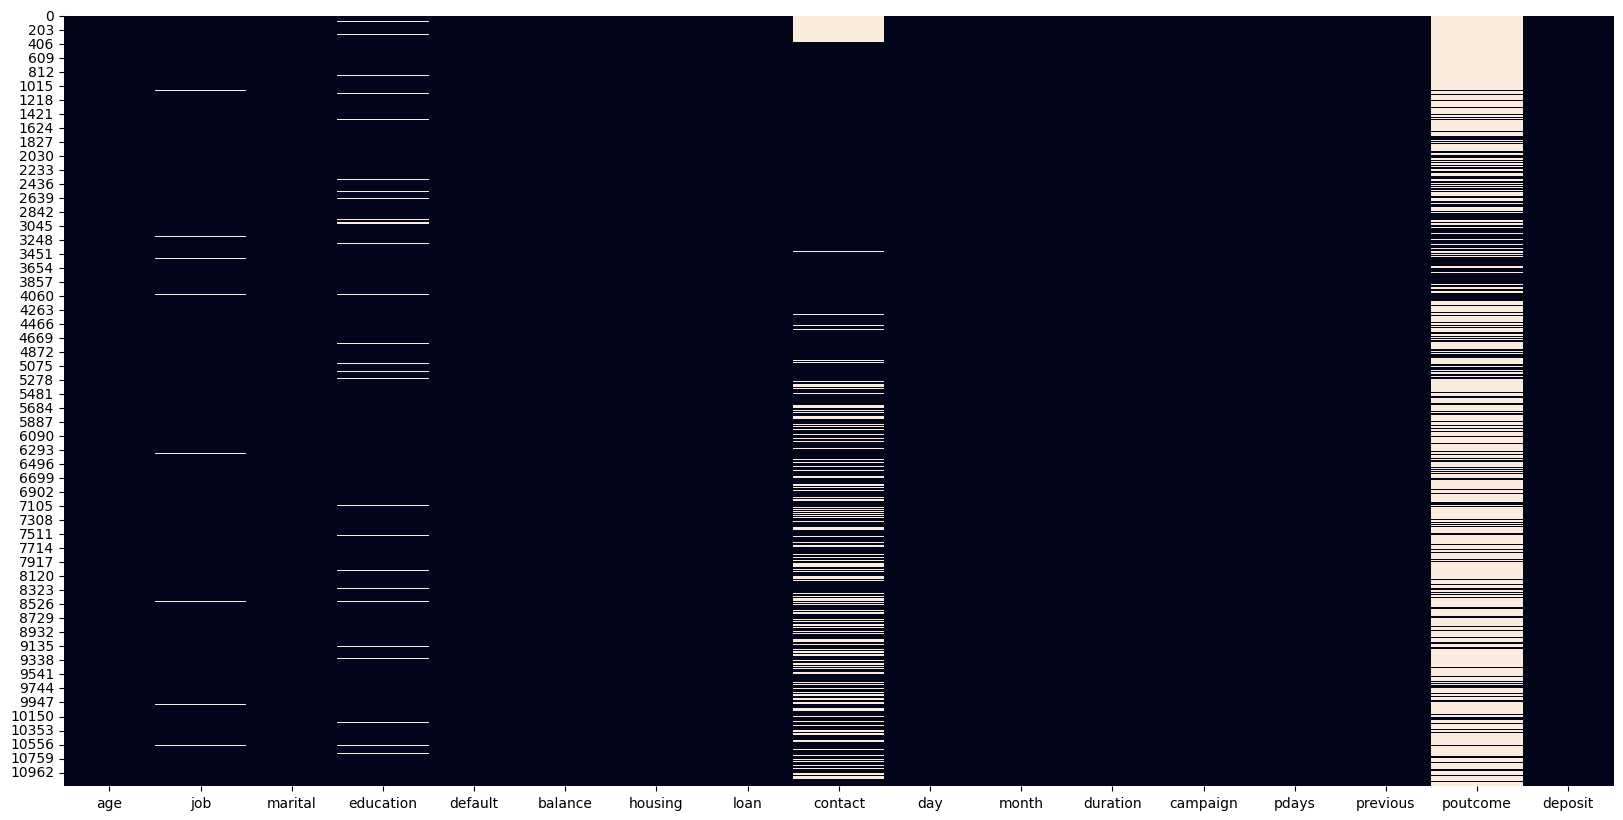

In [16]:
# # Checking missing values
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

In [17]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=False)

poutcome     0.745924
contact      0.210177
education    0.044526
job          0.006271
month        0.000000
previous     0.000000
pdays        0.000000
campaign     0.000000
duration     0.000000
age          0.000000
day          0.000000
loan         0.000000
housing      0.000000
balance      0.000000
default      0.000000
marital      0.000000
deposit      0.000000
dtype: float64

In [18]:
df[df['poutcome'].isna()]

age          job  marital  education default  balance housing loan  \
0       59       admin.  married  secondary      no     2343     yes   no   
1       56       admin.  married  secondary      no       45      no   no   
2       41   technician  married  secondary      no     1270     yes   no   
3       55     services  married  secondary      no     2476     yes   no   
4       54       admin.  married   tertiary      no      184      no   no   
...    ...          ...      ...        ...     ...      ...     ...  ...   
11156   34  blue-collar   single  secondary      no      -72     yes   no   
11157   33  blue-collar   single    primary      no        1     yes   no   
11158   39     services  married  secondary      no      733      no   no   
11159   32   technician   single  secondary      no       29      no   no   
11161   34   technician  married  secondary      no        0      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
0           NaN    5   may      1042         1     -1         0      NaN   
1           NaN    5   may      1467         1     -1         0      NaN   
2           NaN    5   may      1389         1     -1         0      NaN   
3           NaN    5   may       579         1     -1         0      NaN   
4           NaN    5   may       673         2     -1         0      NaN   
...         ...  ...   ...       ...       ...    ...       ...      ...   
11156  cellular    7   jul       273         5     -1         0      NaN   
11157  cellular   20   apr       257         1     -1         0      NaN   
11158       NaN   16   jun        83         4     -1         0      NaN   
11159  cellular   19   aug       156         2     -1         0      NaN   
11161  cellular    9   jul       628         1     -1         0      NaN   

      deposit  
0         yes  
1         yes  
2         yes  
3         yes  
4         yes  
...       ...  
11156      no  
11157      no  
11158      no  
11159      no  
11161      no  

[8326 rows x 17 columns]

In [19]:
df[df['contact'].isna()]

age          job   marital  education default  balance housing loan  \
0       59       admin.   married  secondary      no     2343     yes   no   
1       56       admin.   married  secondary      no       45      no   no   
2       41   technician   married  secondary      no     1270     yes   no   
3       55     services   married  secondary      no     2476     yes   no   
4       54       admin.   married   tertiary      no      184      no   no   
...    ...          ...       ...        ...     ...      ...     ...  ...   
11140   55     services  divorced  secondary      no     2166     yes   no   
11144   60      retired   married  secondary      no        0     yes   no   
11148   32  blue-collar   married  secondary      no        1     yes   no   
11151   40   management   married   tertiary      no      917     yes   no   
11158   39     services   married  secondary      no      733      no   no   

      contact  day month  duration  campaign  pdays  previous poutcome deposit  
0         NaN    5   may      1042         1     -1         0      NaN     yes  
1         NaN    5   may      1467         1     -1         0      NaN     yes  
2         NaN    5   may      1389         1     -1         0      NaN     yes  
3         NaN    5   may       579         1     -1         0      NaN     yes  
4         NaN    5   may       673         2     -1         0      NaN     yes  
...       ...  ...   ...       ...       ...    ...       ...      ...     ...  
11140     NaN   28   may        23        17     -1         0      NaN      no  
11144     NaN   15   may       229         1     -1         0      NaN      no  
11148     NaN    8   may       102         1     -1         0      NaN      no  
11151     NaN   20   may       292         1     -1         0      NaN      no  
11158     NaN   16   jun        83         4     -1         0      NaN      no  

[2346 rows x 17 columns]

In [20]:
df[df['education'].isna()]

age          job  marital education default  balance housing loan  \
44      52   management  married       NaN      no     2240     yes   no   
58      40   technician   single       NaN      no     3652     yes   no   
65      44  blue-collar  married       NaN      no      146     yes   no   
75      36     services   single       NaN      no      281     yes   no   
108     35  blue-collar  married       NaN      no     4822     yes   no   
...    ...          ...      ...       ...     ...      ...     ...  ...   
11017   42  blue-collar  married       NaN      no     1154     yes   no   
11038   36  blue-collar  married       NaN      no     1023     yes   no   
11059   35   technician   single       NaN      no      726     yes   no   
11072   41   technician   single       NaN      no      356     yes   no   
11137   49      retired  married       NaN      no      247      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
44          NaN   13   may       845         1     -1         0      NaN   
58          NaN   14   may      1028         2     -1         0      NaN   
65          NaN   15   may       483         1     -1         0      NaN   
75          NaN   16   may       515         1     -1         0      NaN   
108         NaN   20   may       843         2     -1         0      NaN   
...         ...  ...   ...       ...       ...    ...       ...      ...   
11017  cellular   16   apr       341         2    336         3    other   
11038  cellular    4   feb       184         2     -1         0      NaN   
11059  cellular    5   may       163         1     -1         0      NaN   
11072       NaN   13   may        93         2     -1         0      NaN   
11137       NaN   15   may       213         2     -1         0      NaN   

      deposit  
44        yes  
58        yes  
65        yes  
75        yes  
108       yes  
...       ...  
11017      no  
11038      no  
11059      no  
11072      no  
11137      no  

[497 rows x 17 columns]

In [21]:
df[df['job'].isna()]

age  job  marital  education default  balance housing loan    contact  \
66      49  NaN  married    primary      no      341     yes  yes        NaN   
668     52  NaN  married        NaN      no     5361      no   no   cellular   
861     60  NaN  married        NaN      no    17297      no   no   cellular   
1075    31  NaN  married  secondary      no      111      no   no   cellular   
1091    34  NaN   single  secondary      no      859      no   no   cellular   
...    ...  ...      ...        ...     ...      ...     ...  ...        ...   
9845    36  NaN  married  secondary      no      179      no   no   cellular   
9976    43  NaN  married    primary      no        0     yes   no   cellular   
10570   77  NaN  married        NaN      no      397      no   no  telephone   
10660   54  NaN  married        NaN      no      390      no   no   cellular   
10805   51  NaN  married        NaN      no     2642      no   no   cellular   

       day month  duration  campaign  pdays  previous poutcome deposit  
66      15   may       520         2     -1         0      NaN     yes  
668      5   aug       607         3     -1         0      NaN     yes  
861     26   aug       664        11     -1         0      NaN     yes  
1075    21   nov       504         2     93         2  failure     yes  
1091    28   jan       829         1     -1         0      NaN     yes  
...    ...   ...       ...       ...    ...       ...      ...     ...  
9845     8   aug        14         8     -1         0      NaN      no  
9976     9   jul       132         1     -1         0      NaN      no  
10570    8   nov       207         1    185         3  success      no  
10660   20   aug        68         5     -1         0      NaN      no  
10805   29   jul        52         6     -1         0      NaN      no  

[70 rows x 17 columns]

Nous allons supprimer la variables 'poutcome' car ayant plus de 70% de données manquantes representant les résultats des campagnes de marketing précédentes.

Pour les variables 'contact', 'education' et 'job'
nous allons utiliser l'imputation par le mode comme ce sont des variables cathégorielles.






###### Détection des outliers

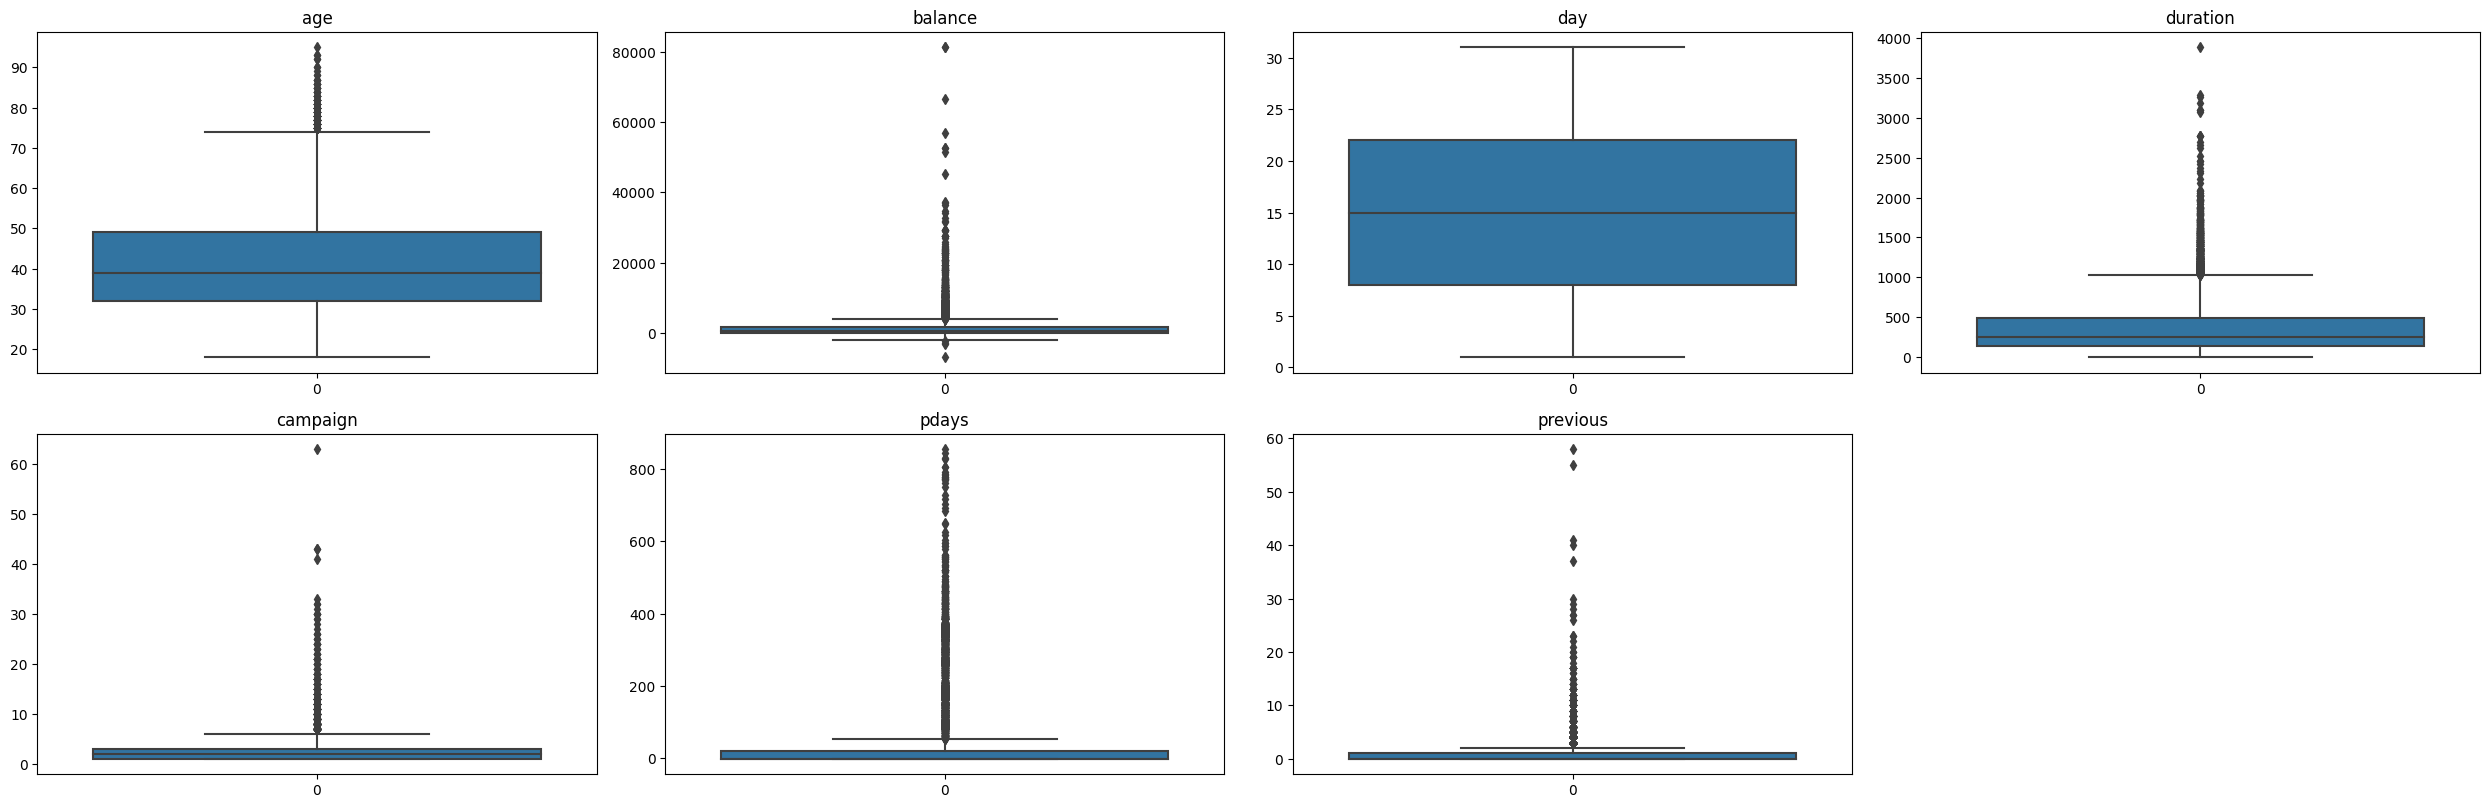

In [22]:
# plot for outliers detection

plt.figure(figsize=(25,20))
for i in range(len(num_cols)):
    plt.subplot(5,4,i+1)
    sns.boxplot(df[num_cols[i]])
    plt.title(num_cols[i])

plt.tight_layout()

In [23]:
#let us numerically draw conclusions
#creating function that can calculate interquartile range of the data
def calc_interquartile(data, column):
    global lower, upper
    #calculating the first and third quartile
    first_quartile, third_quartile = np.percentile(data[column], 25), np.percentile(data[column], 75)
    #calculate the interquartilerange
    iqr = third_quartile - first_quartile
    # outlier cutoff (1.5 is a generally taken as a threshold thats why i am also taking it)
    cutoff = iqr*1.5
    #calculate the lower and upper limits
    lower, upper = first_quartile - cutoff , third_quartile + cutoff
    #remove the outliers from the columns
    upper_outliers = data[data[column] > upper]
    lower_outliers = data[data[column] < lower]
    print('Lower outliers', lower_outliers.shape[0])
    print('Upper outliers', upper_outliers.shape[0])
    return print('total outliers', upper_outliers.shape[0] + lower_outliers.shape[0])


Total outliers in  age
Lower outliers 0
Upper outliers 171
total outliers 171
74.5 6.5


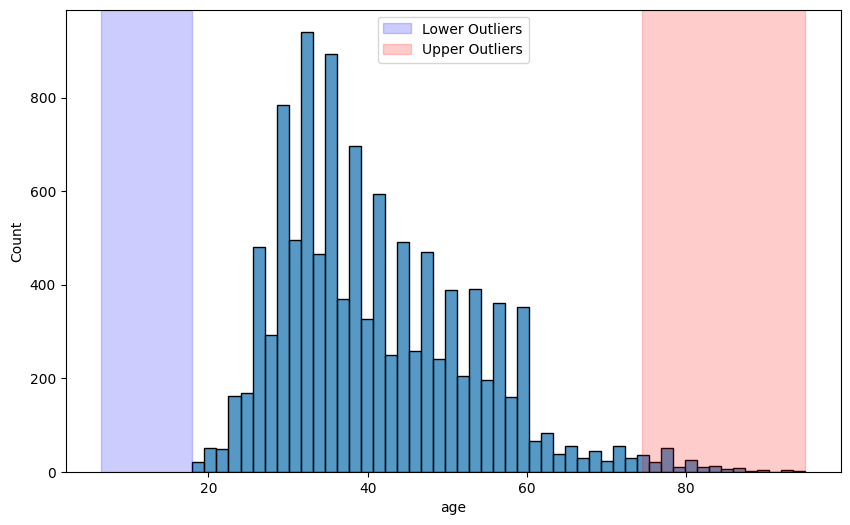

Total outliers in  balance
Lower outliers 4
Upper outliers 1051
total outliers 1055
4087.0 -2257.0


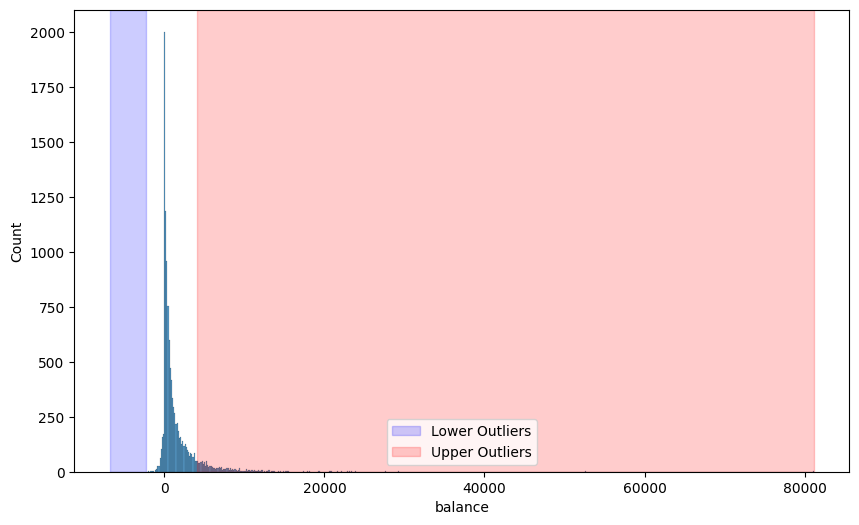

Total outliers in  day
Lower outliers 0
Upper outliers 0
total outliers 0
43.0 -13.0


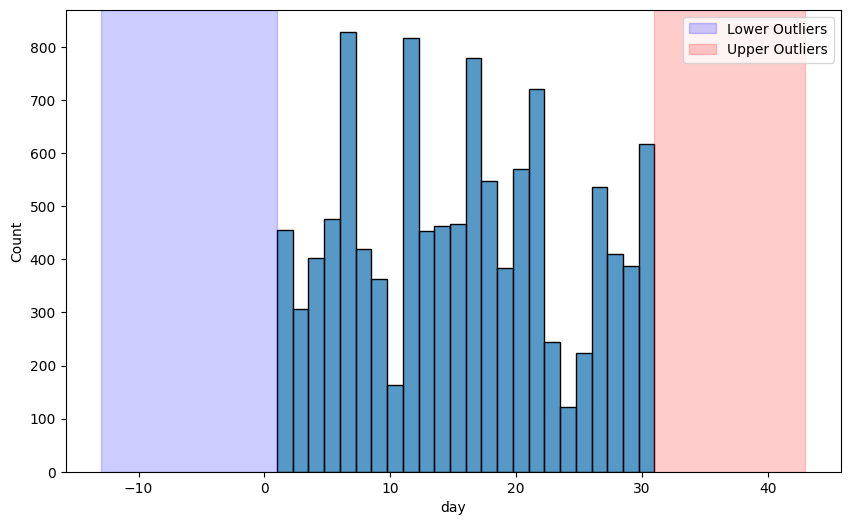

Total outliers in  duration
Lower outliers 0
Upper outliers 636
total outliers 636
1033.0 -399.0


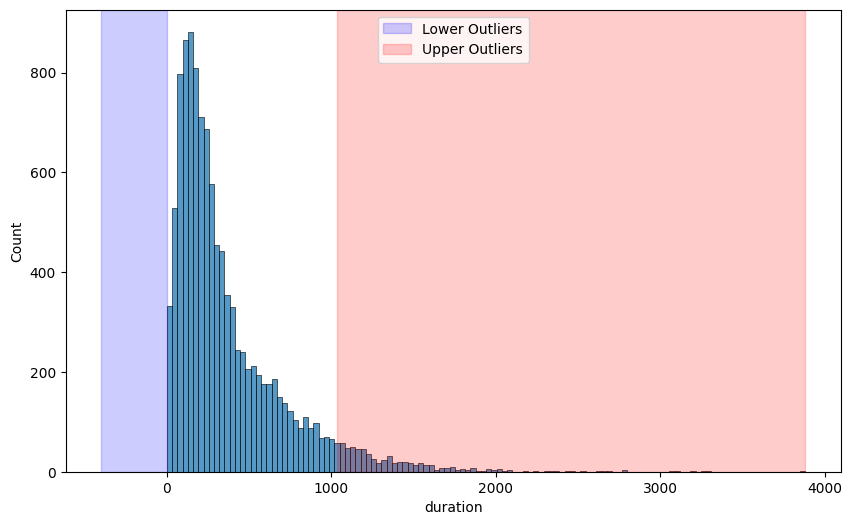

Total outliers in  campaign
Lower outliers 0
Upper outliers 601
total outliers 601
6.0 -2.0


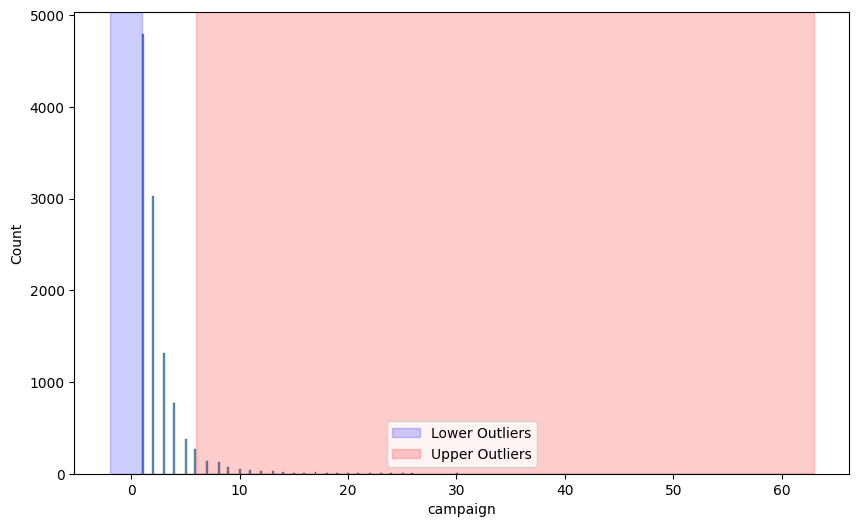

Total outliers in  pdays
Lower outliers 0
Upper outliers 2750
total outliers 2750
53.375 -33.625


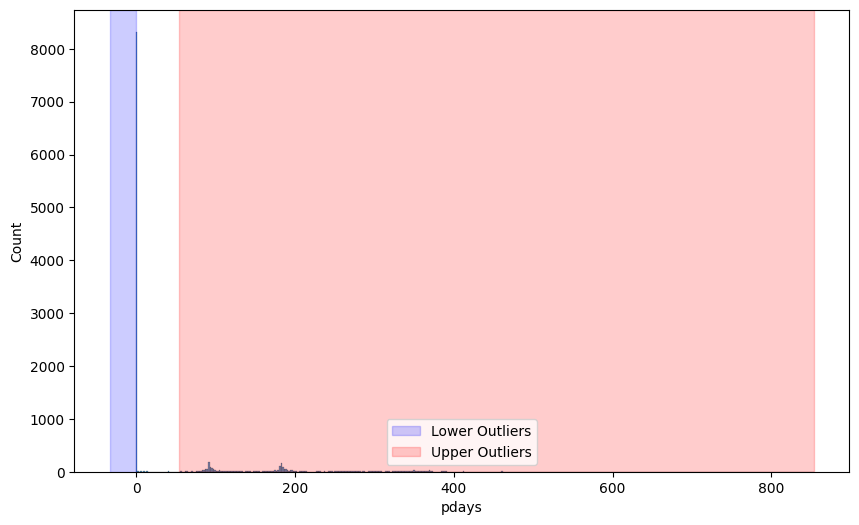

Total outliers in  previous
Lower outliers 0
Upper outliers 1258
total outliers 1258
2.5 -1.5


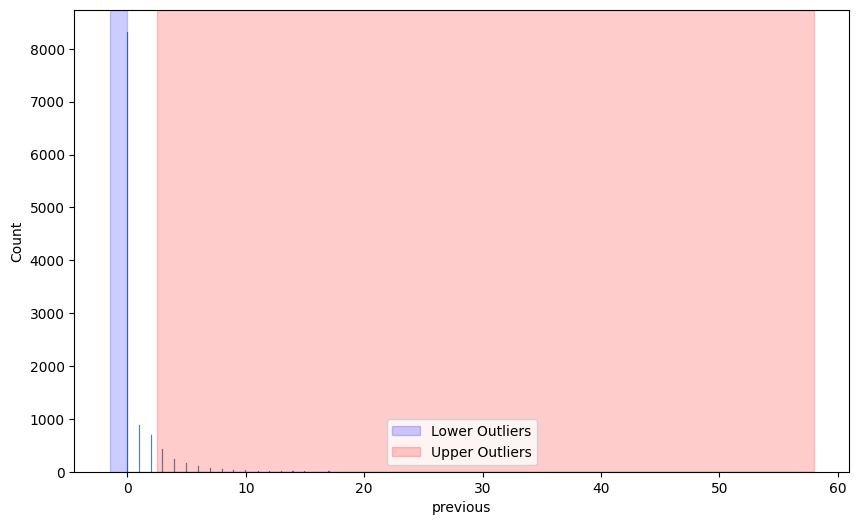

In [24]:
#plotting outliers graph for each feature
#for  col in df.select_dtypes('float'):
for  col in num_cols:
  print('Total outliers in ', col)
  calc_interquartile(df, col)
  plt.figure(figsize = (10,6))
  sns.histplot(df[col], kde=False)
  print(upper, lower)
  plt.axvspan(xmin = lower,xmax= df[col].min(),alpha=0.2, color='blue', label='Lower Outliers')
  plt.axvspan(xmin = upper,xmax= df[col].max(),alpha=0.2, color='red', label='Upper Outliers')
  plt.legend()
  plt.show()

Il des variales ayant des outliers mais pour une première analyse nous  decidons de les conserver

#### Analyse de fond

In [25]:
%%capture
# creating report
report = sv.analyze(df)


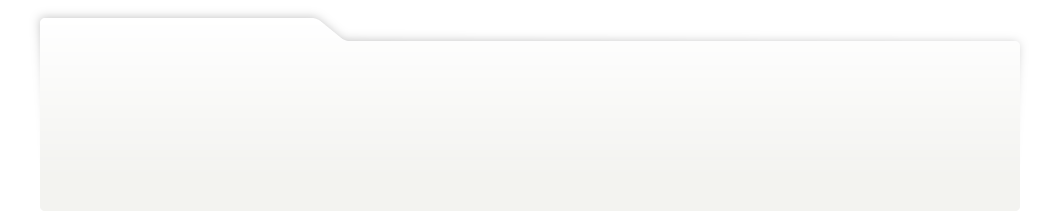
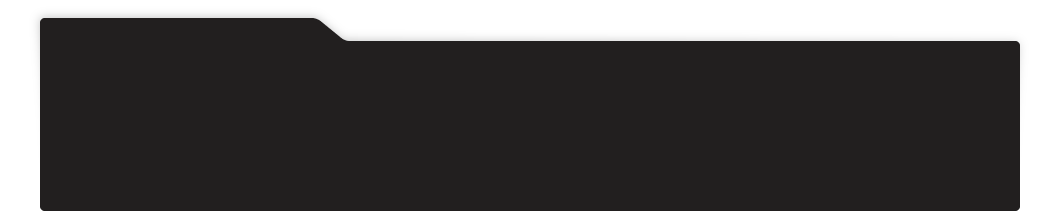
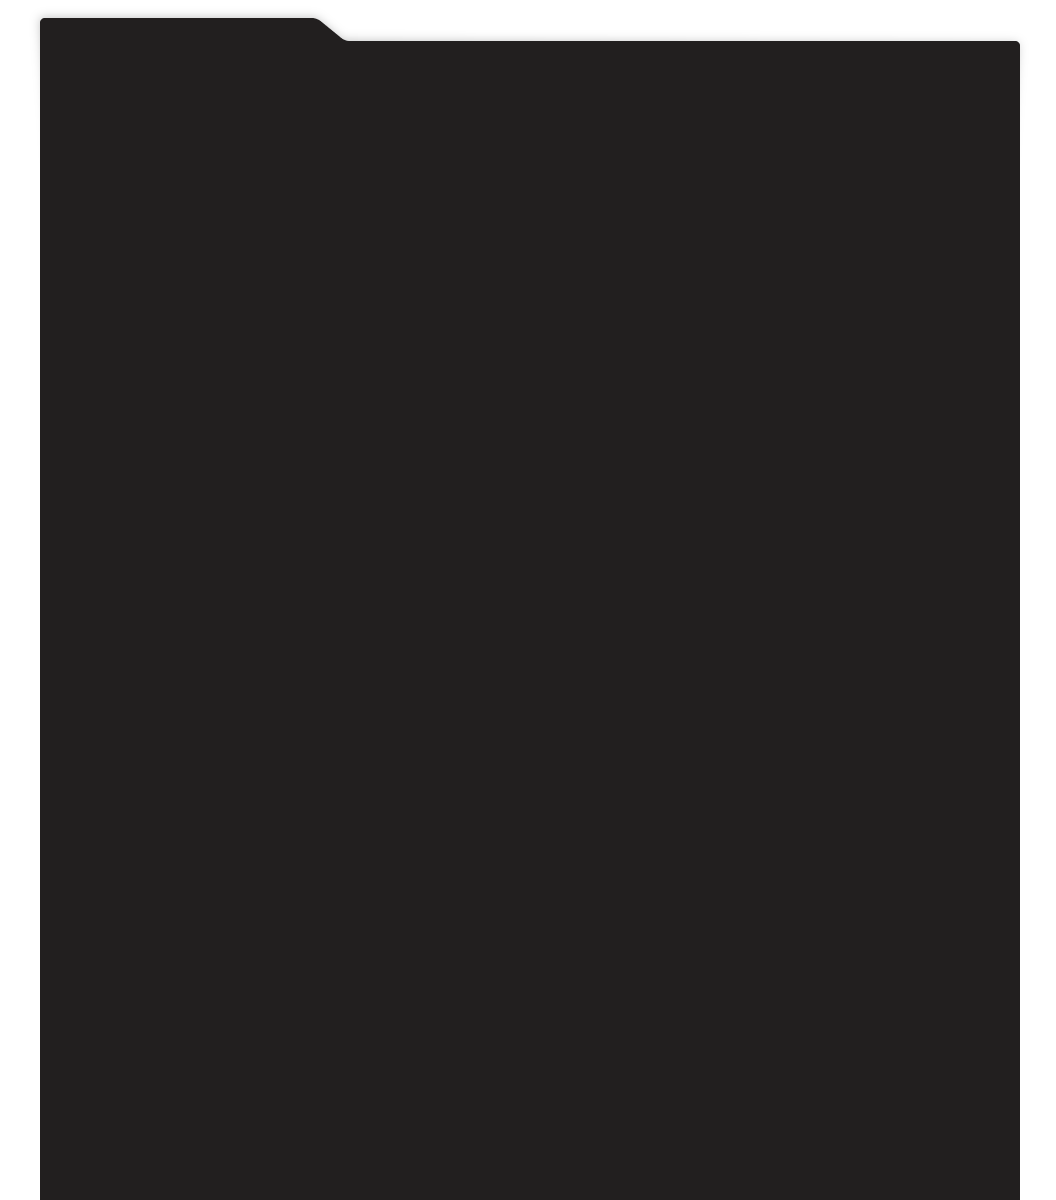
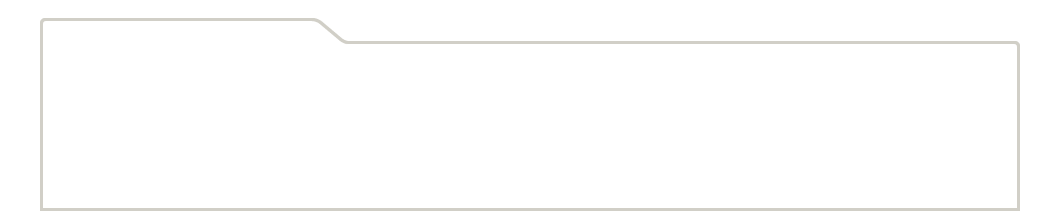
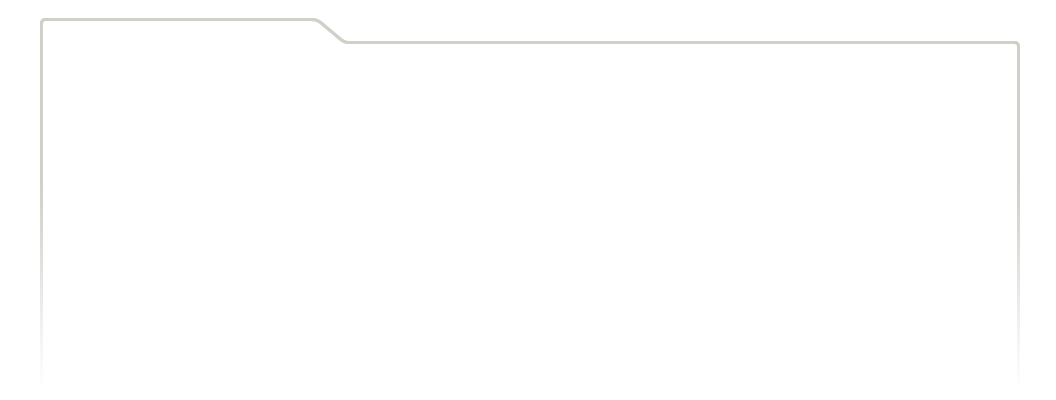
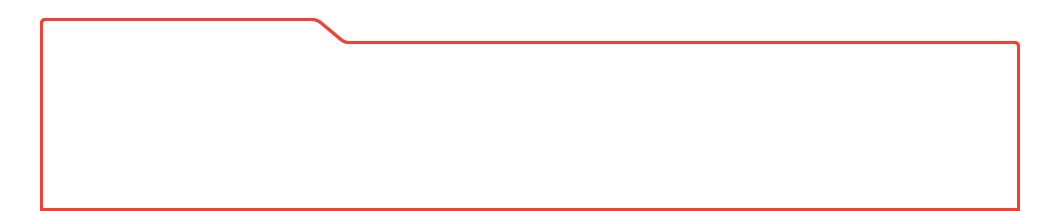
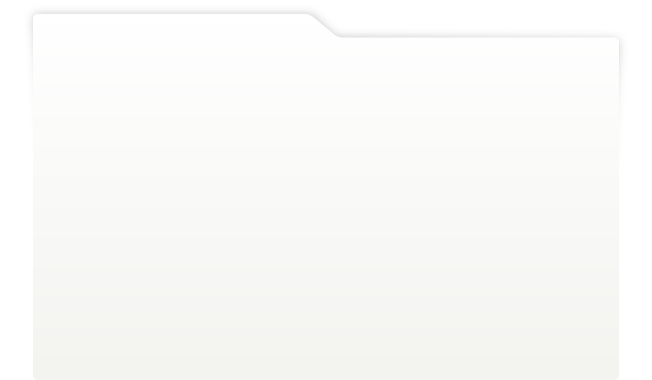
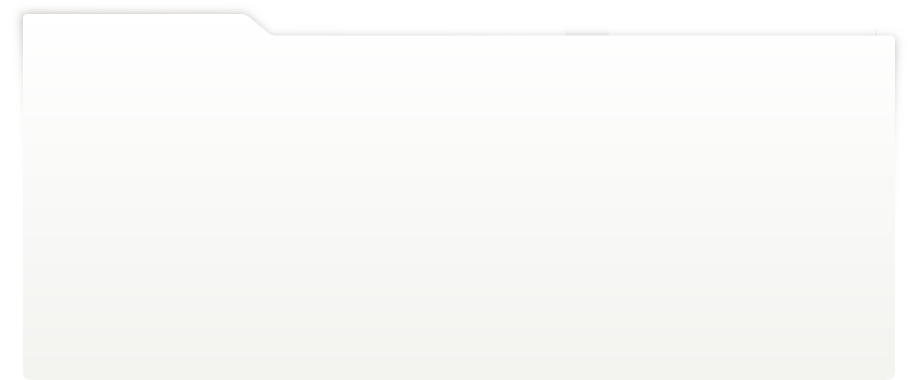
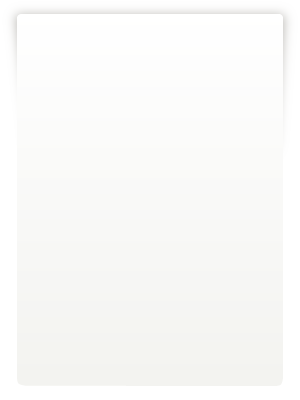
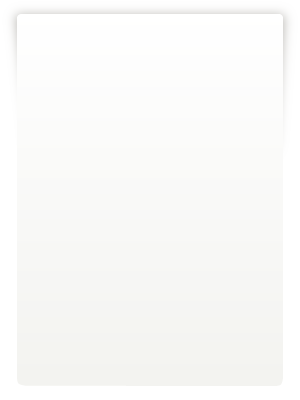
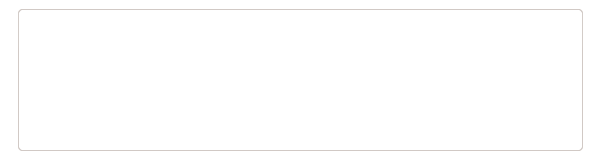
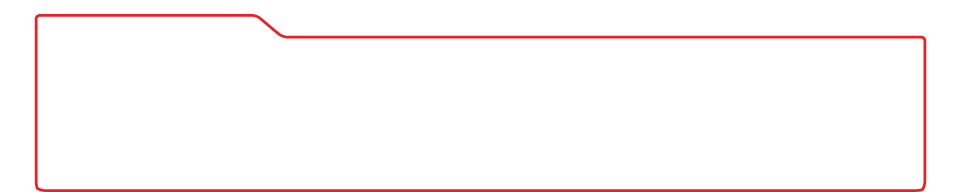
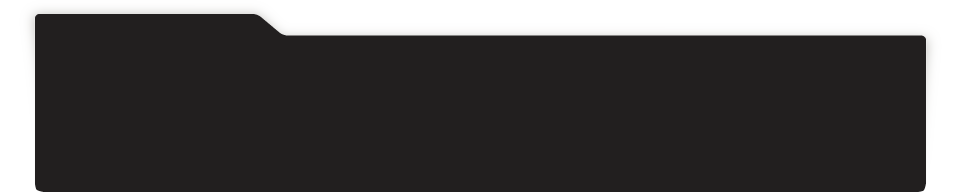
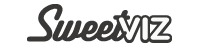
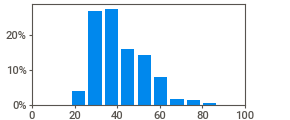
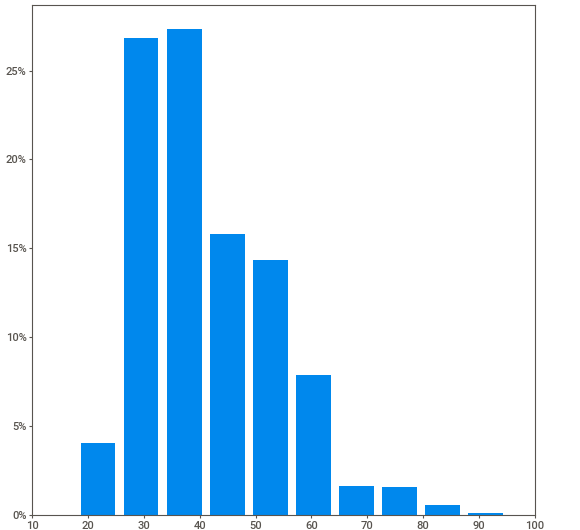
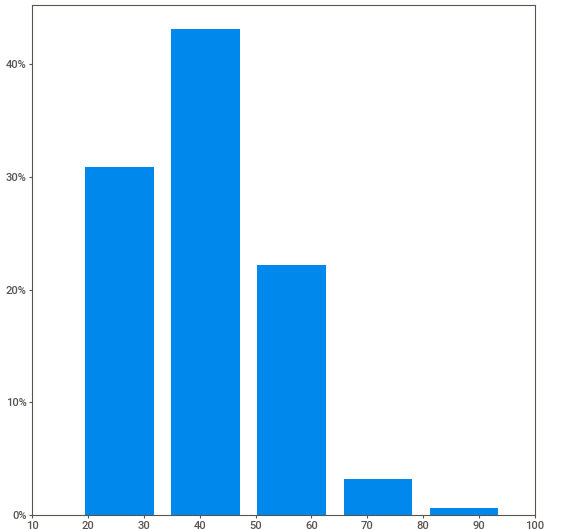
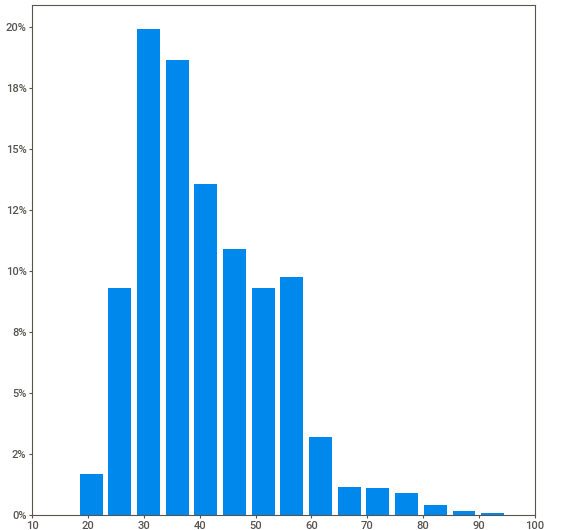
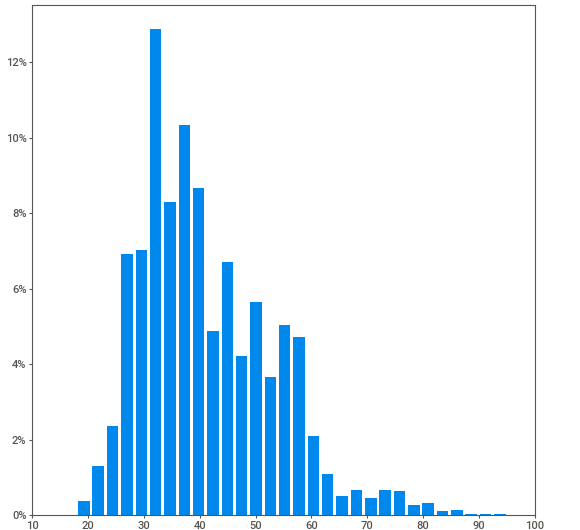
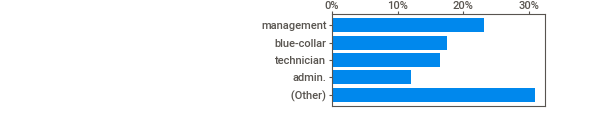
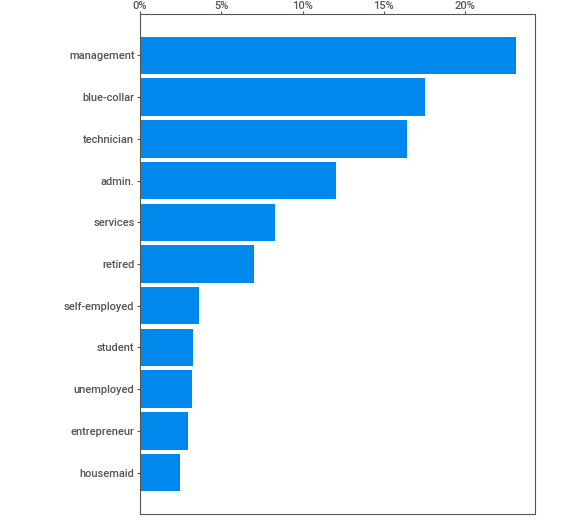
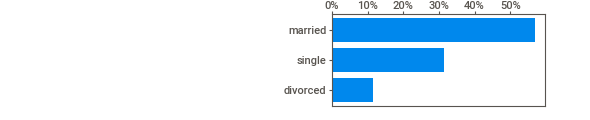
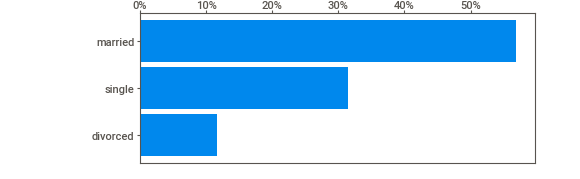
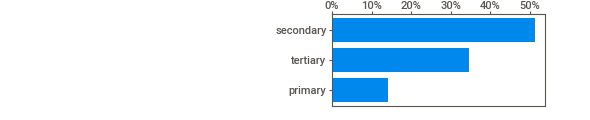
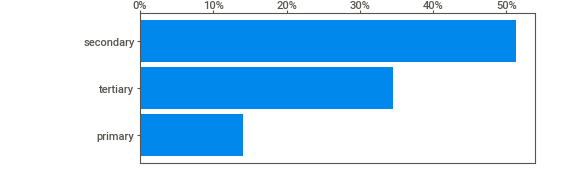
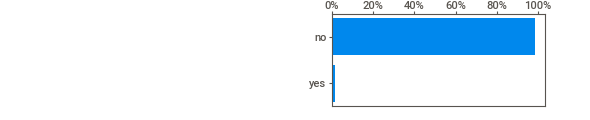
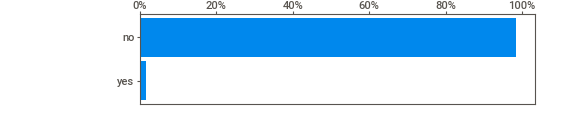
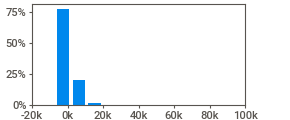
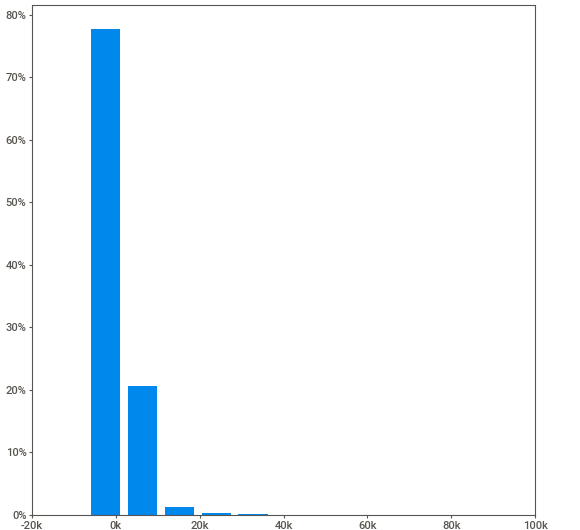
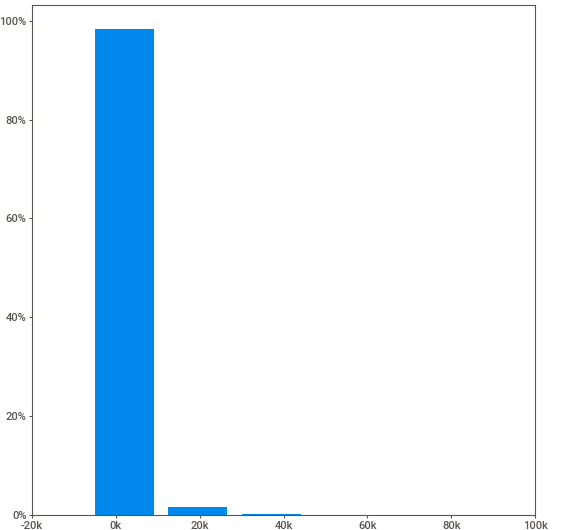
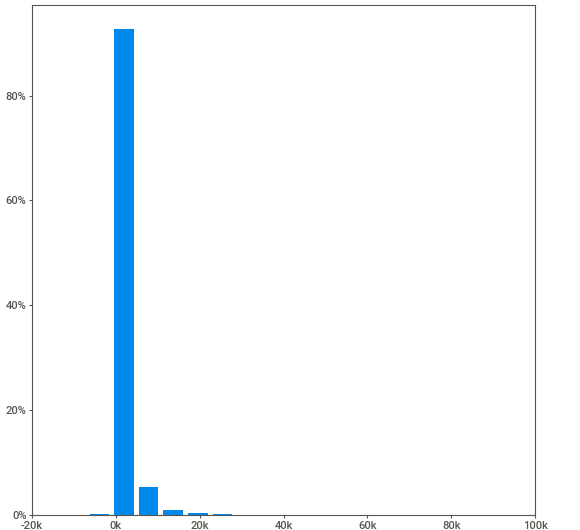
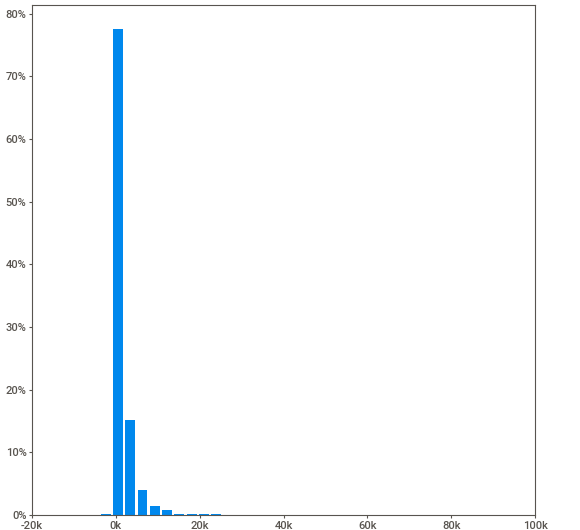
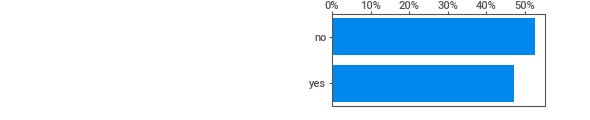
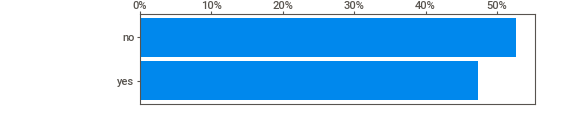
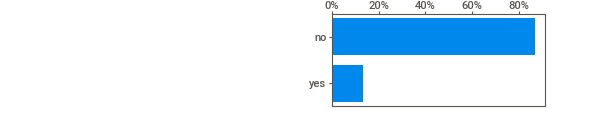
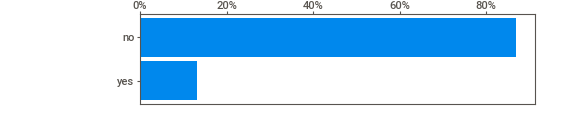
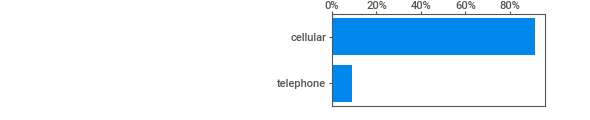
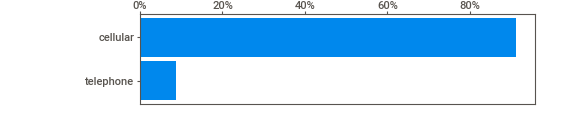
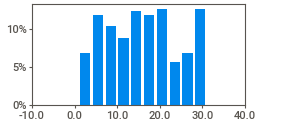
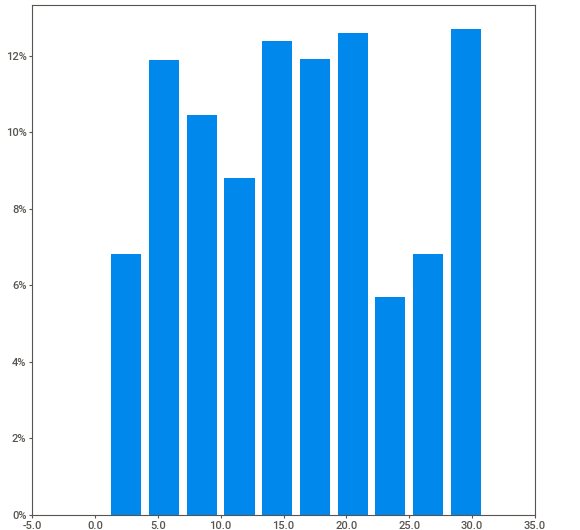
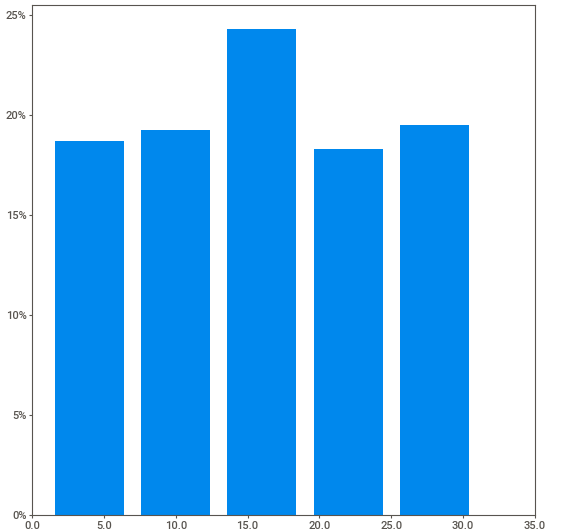
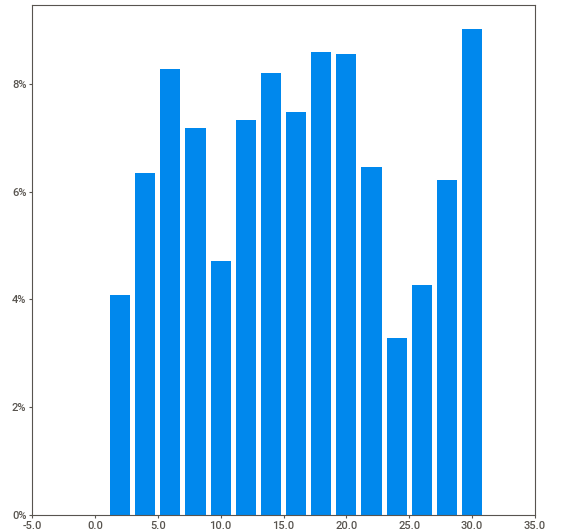
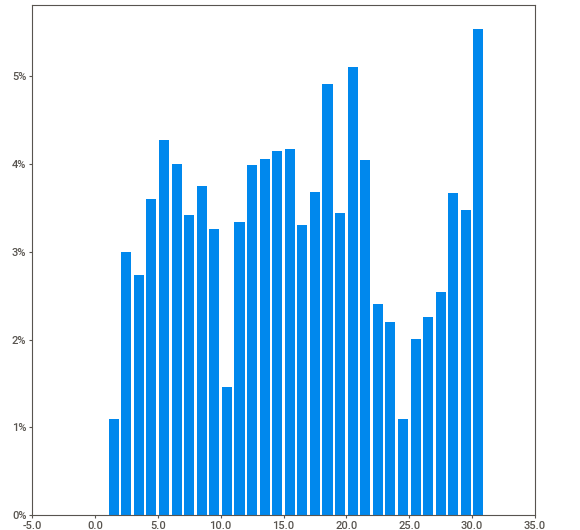
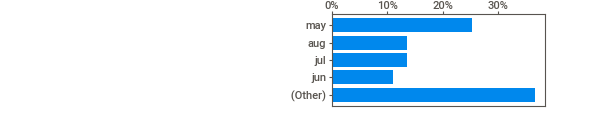
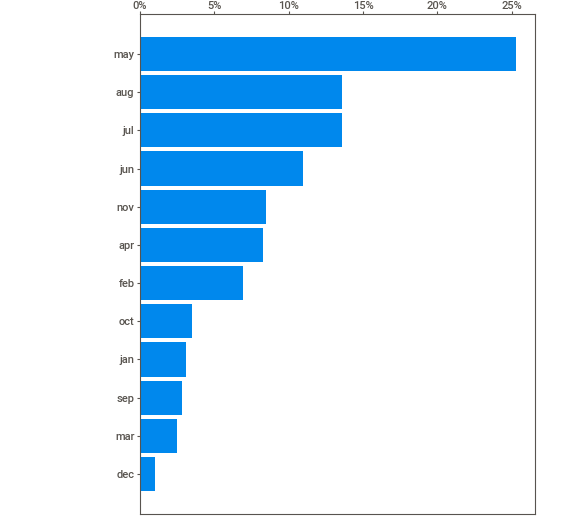
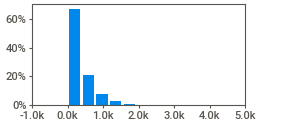
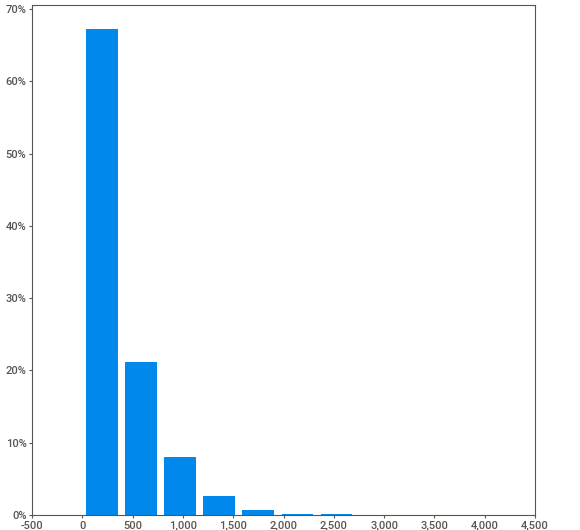
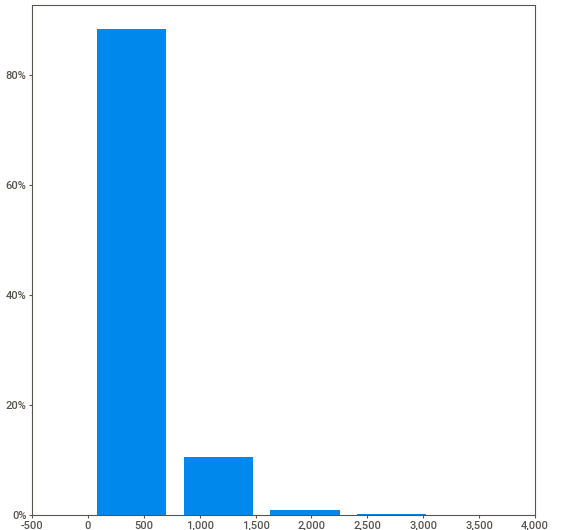
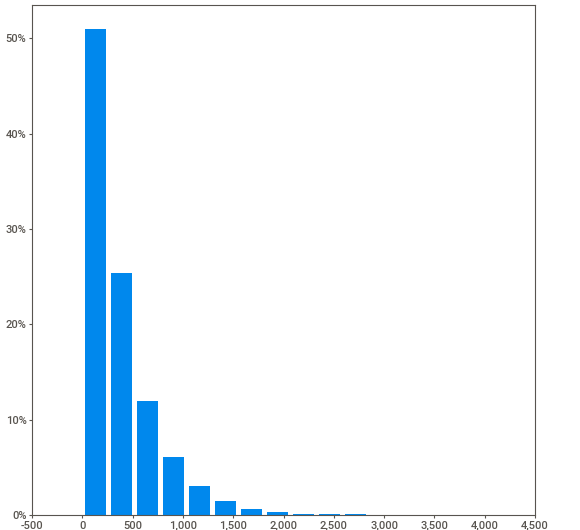
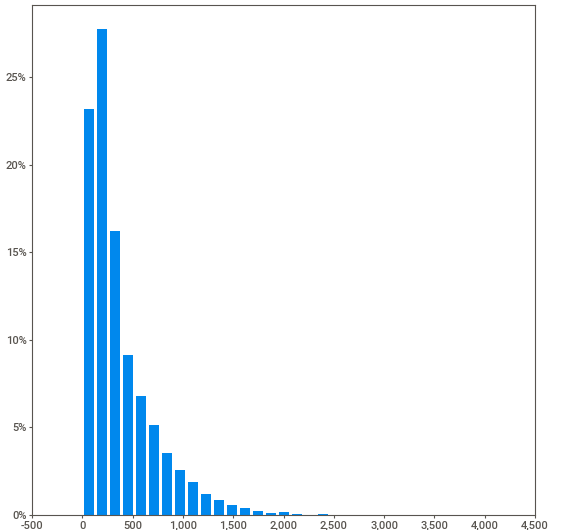
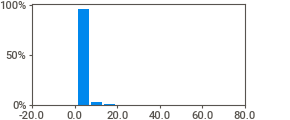
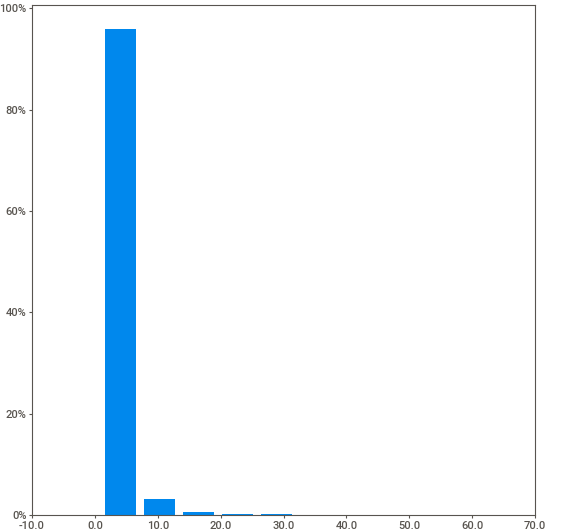
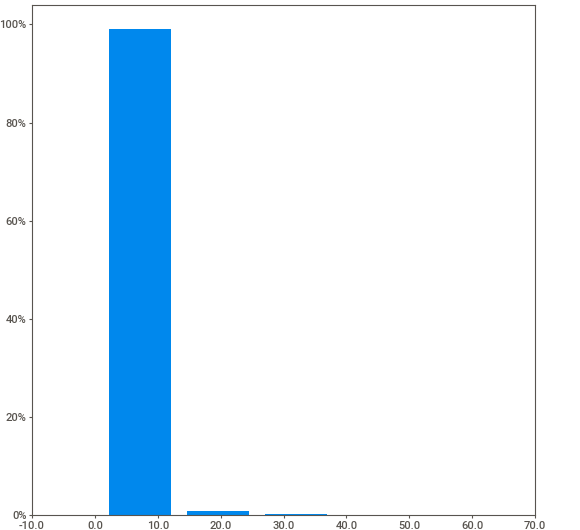
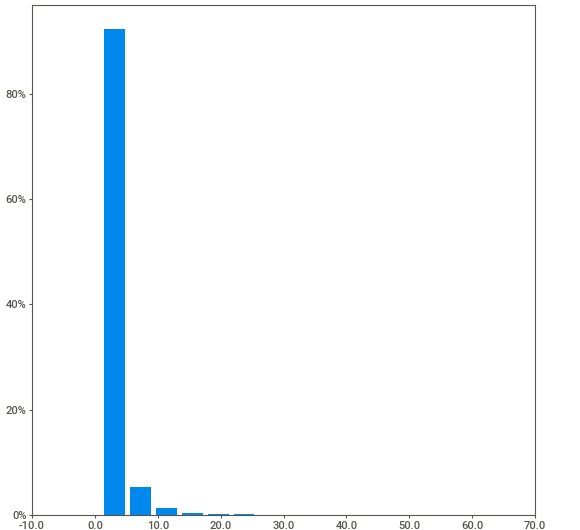
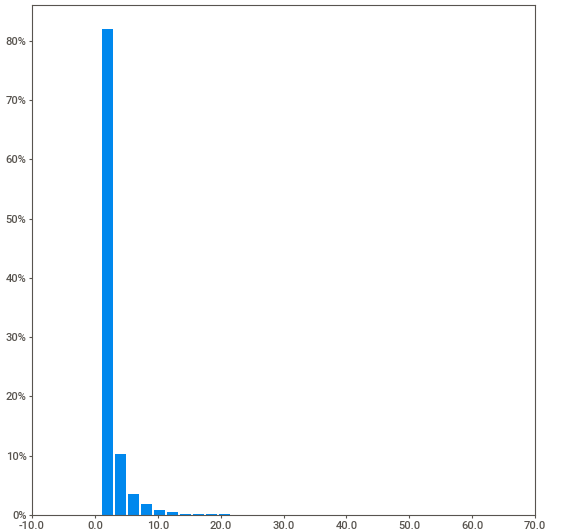
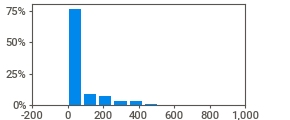
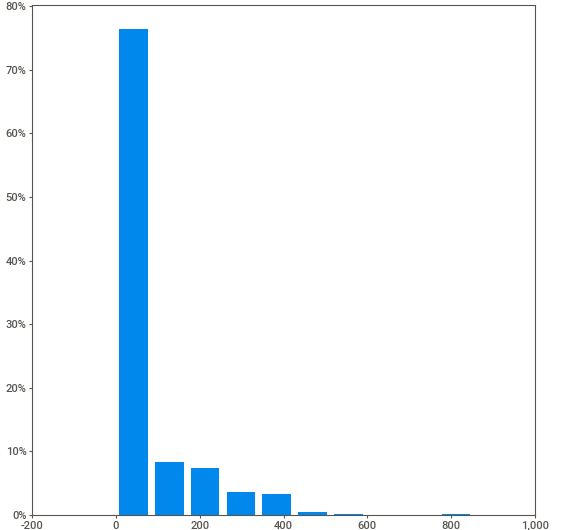
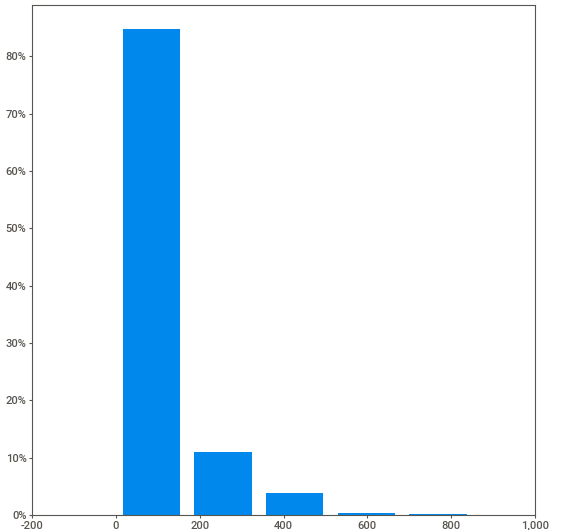
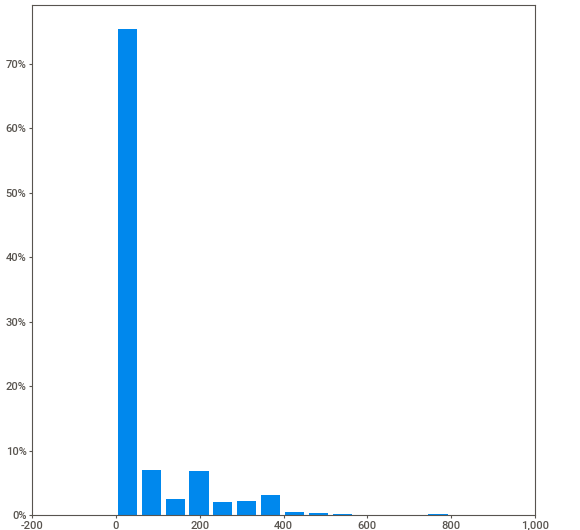
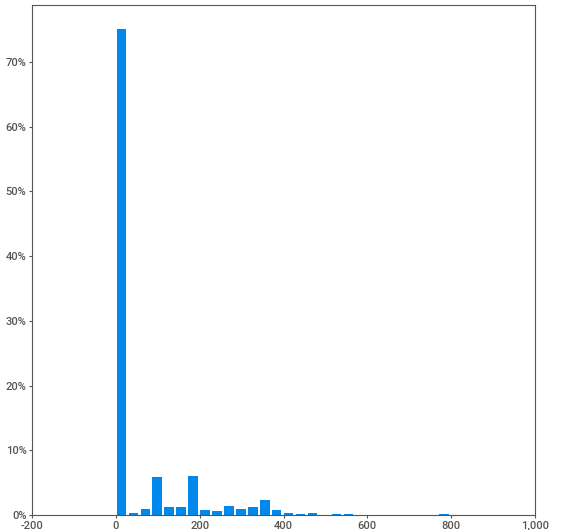
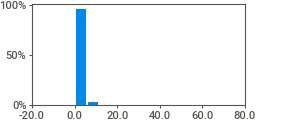
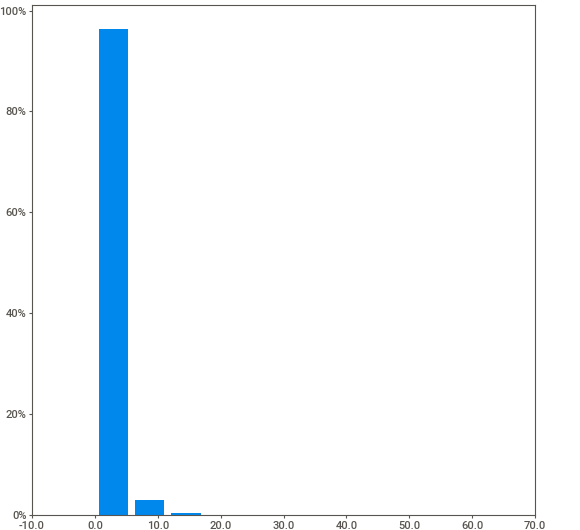
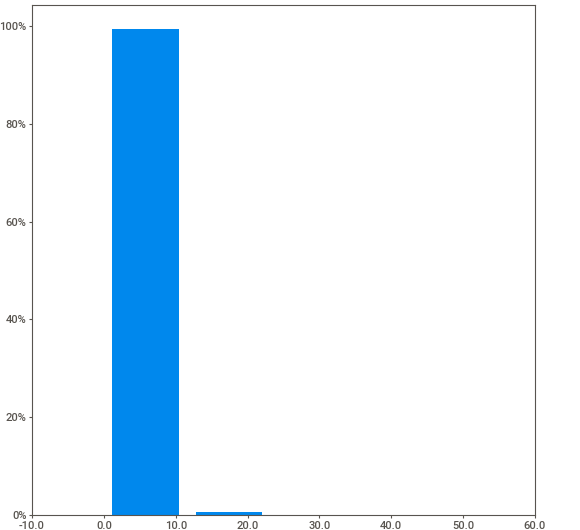
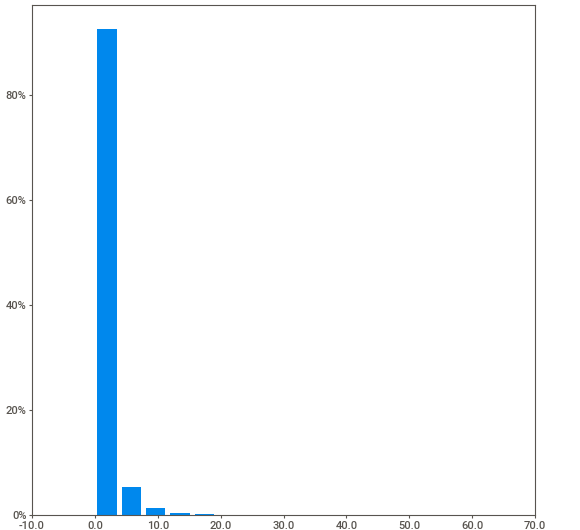
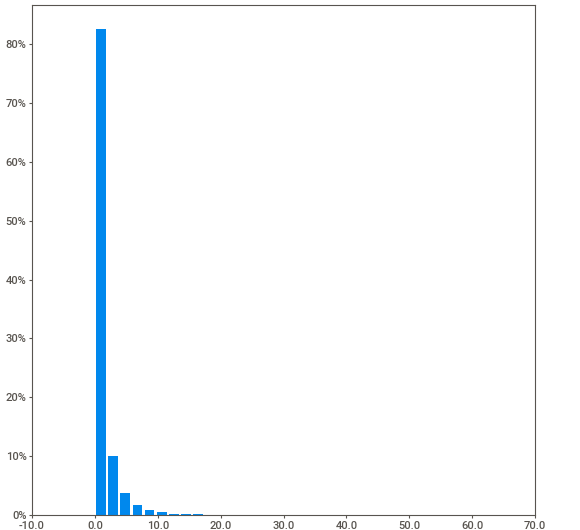
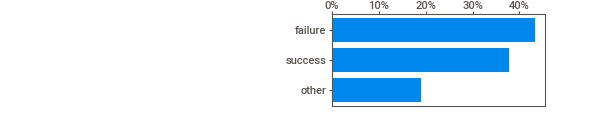
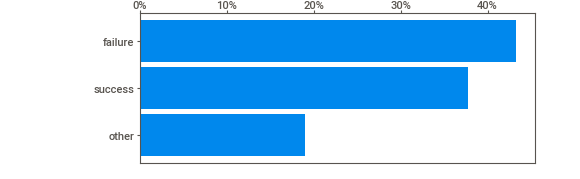
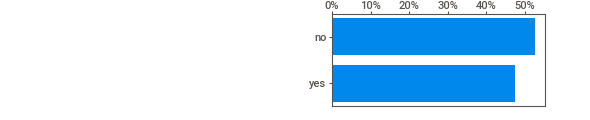
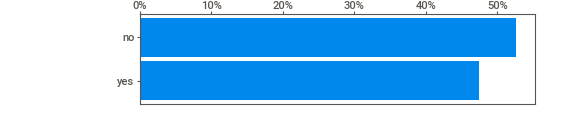
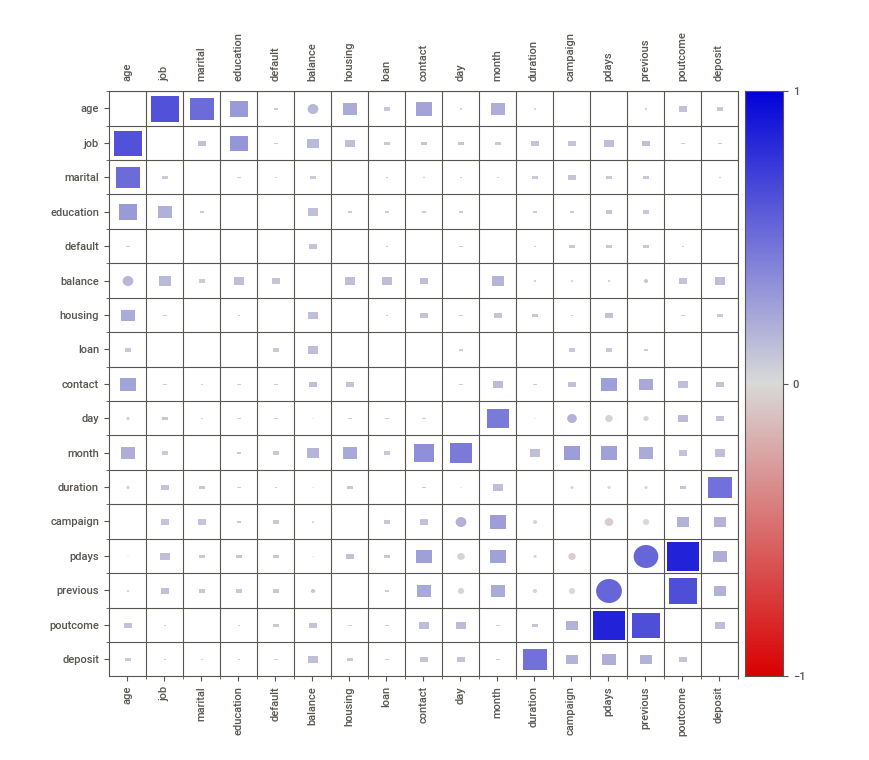
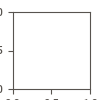

In [26]:
#Visualizing the notebook
report.show_notebook()

###### Analyse univariée

In [27]:
 # General Exploration for Categorical Variables:

def cat_summary(dataframe, plot=False):
    for col_name in cat_cols:
        print("############## Unique Observations of Categorical Data ###############")
        print("The unique number of "+ col_name+": "+ str(dataframe[col_name].nunique()))

        print("############## Frequency of Categorical Data ########################")
        print(pd.DataFrame({col_name : dataframe[col_name].value_counts(),
                            "Ratio": dataframe[col_name].value_counts()/len(dataframe)}))
        if plot == True:
            rgb_values = sns.color_palette("Set2", 6)
            sns.set_theme(style="darkgrid")
            ax = sns.countplot(x=dataframe[col_name], data=dataframe, palette=rgb_values)
            for p in ax.patches:
                ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=10)
            plt.show()

############## Unique Observations of Categorical Data ###############
The unique number of job: 11
############## Frequency of Categorical Data ########################
                job     Ratio
management     2566  0.229887
blue-collar    1944  0.174162
technician     1823  0.163322
admin.         1334  0.119513
services        923  0.082691
retired         778  0.069701
self-employed   405  0.036284
student         360  0.032252
unemployed      357  0.031984
entrepreneur    328  0.029385
housemaid       274  0.024548


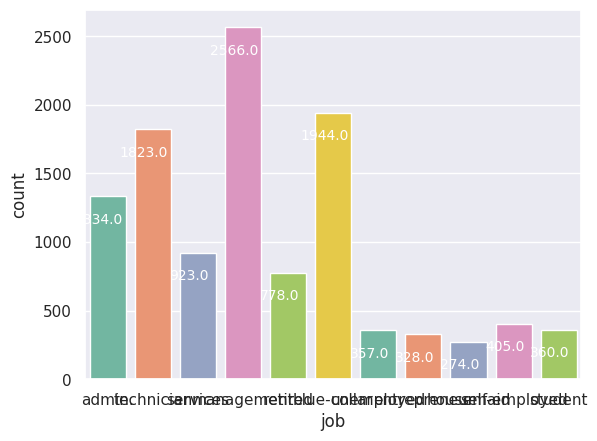

############## Unique Observations of Categorical Data ###############
The unique number of marital: 3
############## Frequency of Categorical Data ########################
          marital     Ratio
married      6351  0.568984
single       3518  0.315176
divorced     1293  0.115839


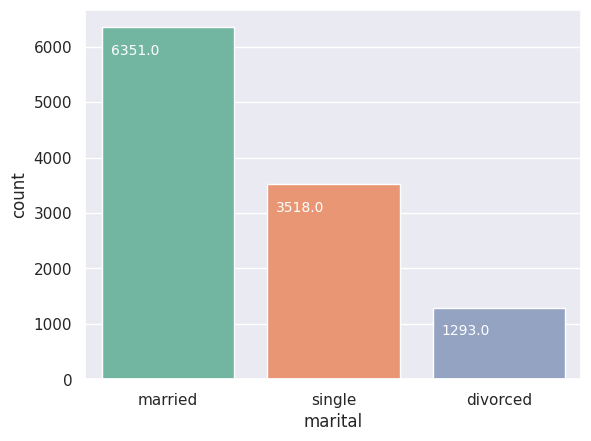

############## Unique Observations of Categorical Data ###############
The unique number of education: 3
############## Frequency of Categorical Data ########################
           education     Ratio
secondary       5476  0.490593
tertiary        3689  0.330496
primary         1500  0.134385


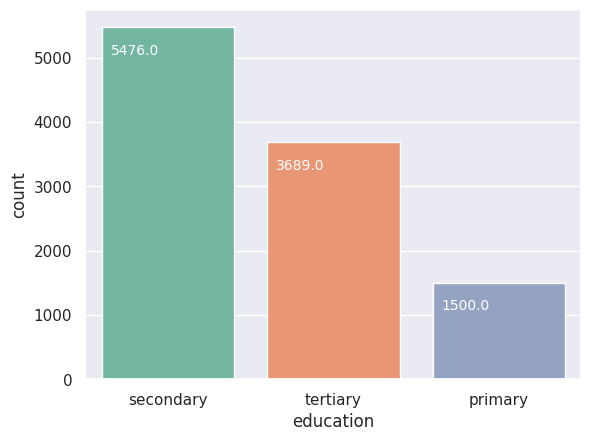

############## Unique Observations of Categorical Data ###############
The unique number of default: 2
############## Frequency of Categorical Data ########################
     default     Ratio
no     10994  0.984949
yes      168  0.015051


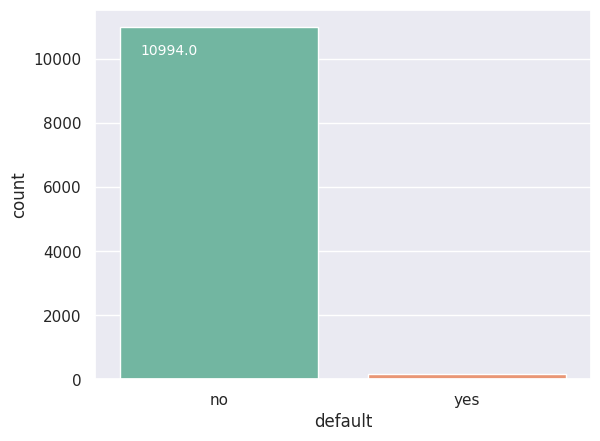

############## Unique Observations of Categorical Data ###############
The unique number of housing: 2
############## Frequency of Categorical Data ########################
     housing     Ratio
no      5881  0.526877
yes     5281  0.473123


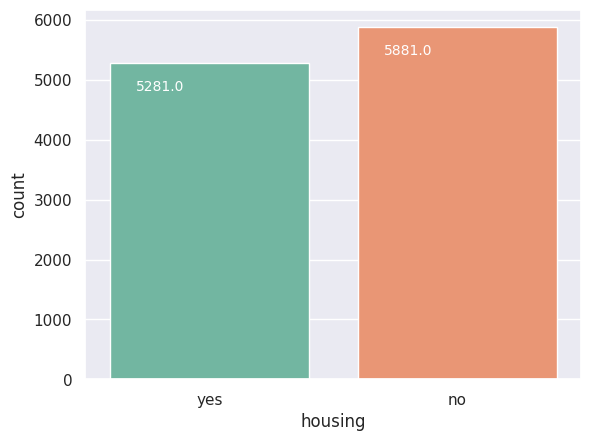

############## Unique Observations of Categorical Data ###############
The unique number of loan: 2
############## Frequency of Categorical Data ########################
     loan     Ratio
no   9702  0.869199
yes  1460  0.130801


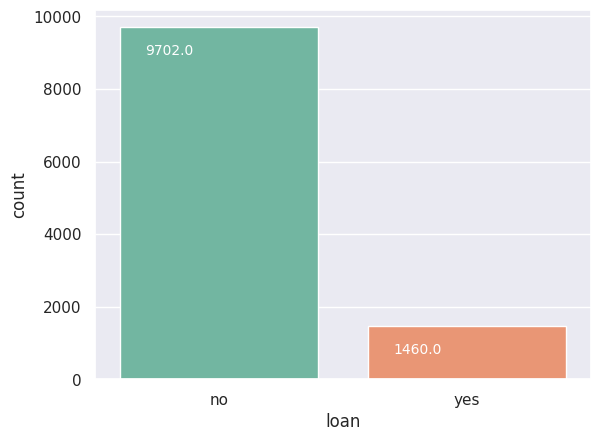

############## Unique Observations of Categorical Data ###############
The unique number of contact: 2
############## Frequency of Categorical Data ########################
           contact     Ratio
cellular      8042  0.720480
telephone      774  0.069342


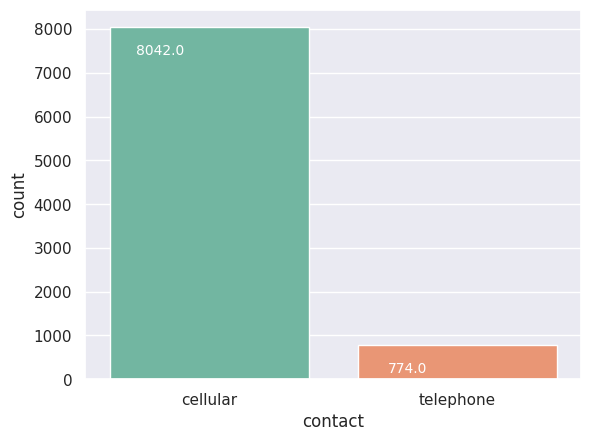

############## Unique Observations of Categorical Data ###############
The unique number of month: 12
############## Frequency of Categorical Data ########################
     month     Ratio
may   2824  0.253001
aug   1519  0.136087
jul   1514  0.135639
jun   1222  0.109479
nov    943  0.084483
apr    923  0.082691
feb    776  0.069522
oct    392  0.035119
jan    344  0.030819
sep    319  0.028579
mar    276  0.024727
dec    110  0.009855


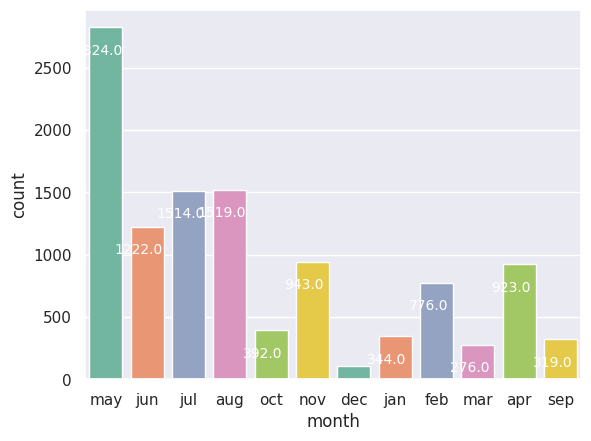

############## Unique Observations of Categorical Data ###############
The unique number of poutcome: 3
############## Frequency of Categorical Data ########################
         poutcome     Ratio
failure      1228  0.110016
success      1071  0.095951
other         537  0.048110


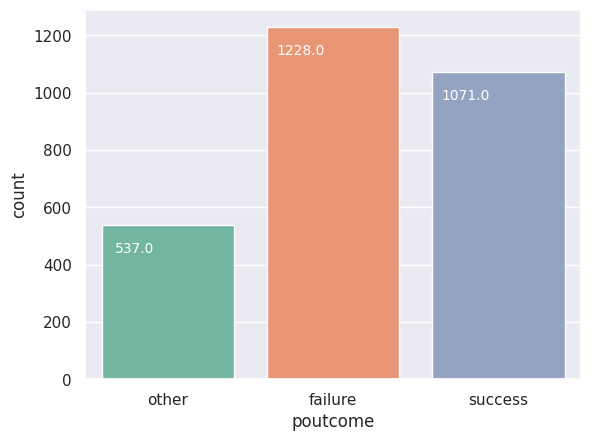

############## Unique Observations of Categorical Data ###############
The unique number of deposit: 2
############## Frequency of Categorical Data ########################
     deposit    Ratio
no      5873  0.52616
yes     5289  0.47384


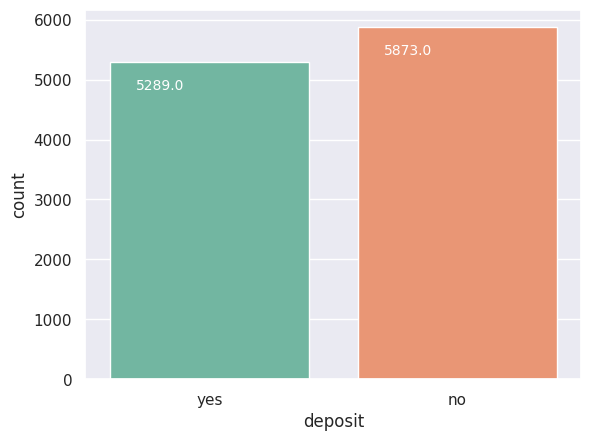

In [28]:
cat_summary(df, plot=True)

In [29]:
# General Exploration for Numerical Variables:

def num_summary(dataframe,  plot=False):
    quantiles = [0.25, 0.50, 0.75, 1]
    for col_name in num_cols:
        print("########## Summary Statistics of " +  col_name + " ############")
        print(dataframe[col_name].describe(quantiles).T)

        if plot:
            sns.histplot(data=dataframe, x=col_name  )
            plt.xlabel(col_name)
            plt.title("The distribution of "+ col_name)
            plt.grid(True)
            plt.show(block=True)

########## Summary Statistics of age ############
count    11162.000000
mean        41.231948
std         11.913369
min         18.000000
25%         32.000000
50%         39.000000
75%         49.000000
100%        95.000000
max         95.000000
Name: age, dtype: float64


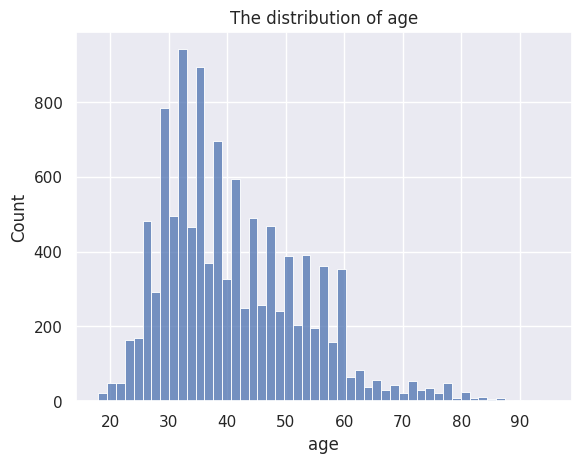

########## Summary Statistics of balance ############
count    11162.000000
mean      1528.538524
std       3225.413326
min      -6847.000000
25%        122.000000
50%        550.000000
75%       1708.000000
100%     81204.000000
max      81204.000000
Name: balance, dtype: float64


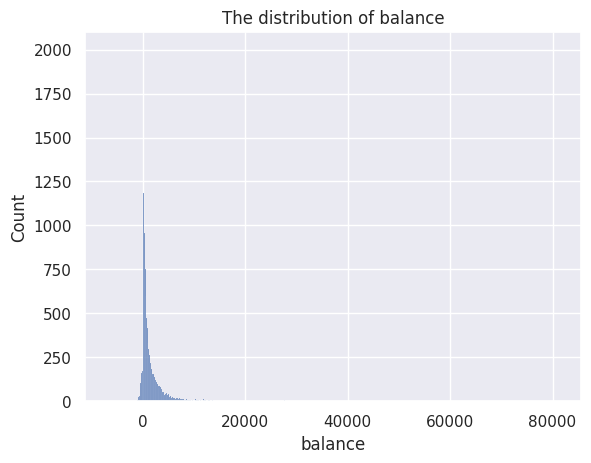

########## Summary Statistics of day ############
count    11162.000000
mean        15.658036
std          8.420740
min          1.000000
25%          8.000000
50%         15.000000
75%         22.000000
100%        31.000000
max         31.000000
Name: day, dtype: float64


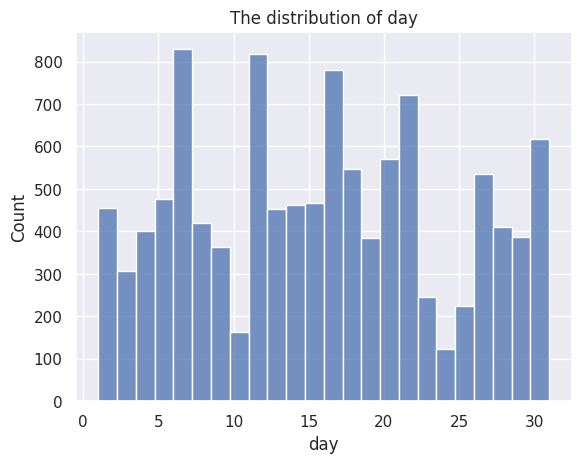

########## Summary Statistics of duration ############
count    11162.000000
mean       371.993818
std        347.128386
min          2.000000
25%        138.000000
50%        255.000000
75%        496.000000
100%      3881.000000
max       3881.000000
Name: duration, dtype: float64


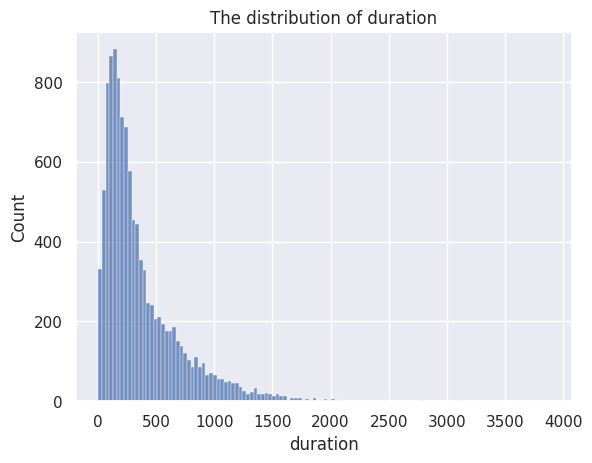

########## Summary Statistics of campaign ############
count    11162.000000
mean         2.508421
std          2.722077
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
100%        63.000000
max         63.000000
Name: campaign, dtype: float64


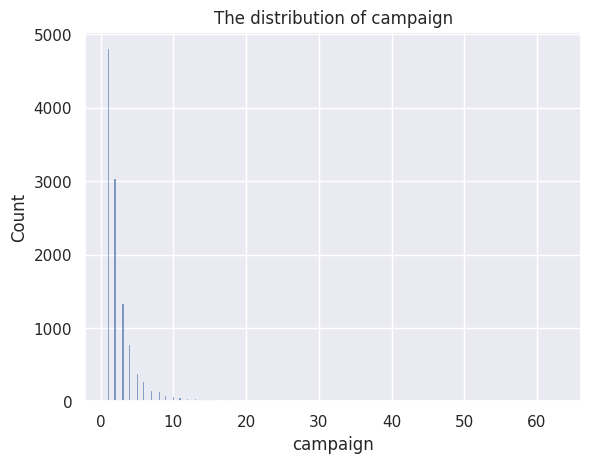

########## Summary Statistics of pdays ############
count    11162.000000
mean        51.330407
std        108.758282
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         20.750000
100%       854.000000
max        854.000000
Name: pdays, dtype: float64


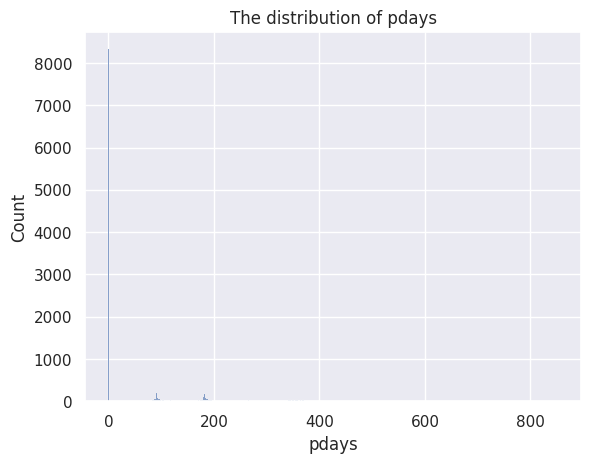

########## Summary Statistics of previous ############
count    11162.000000
mean         0.832557
std          2.292007
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
100%        58.000000
max         58.000000
Name: previous, dtype: float64


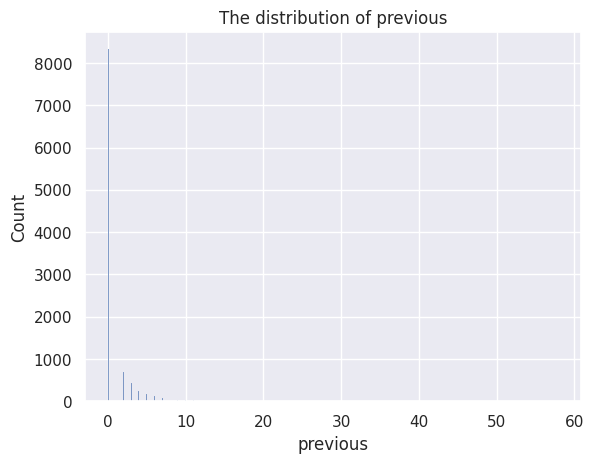

In [30]:
num_summary(df, plot=True)

###### Analyse mulitivariée

<Axes: xlabel='deposit', ylabel='age'>

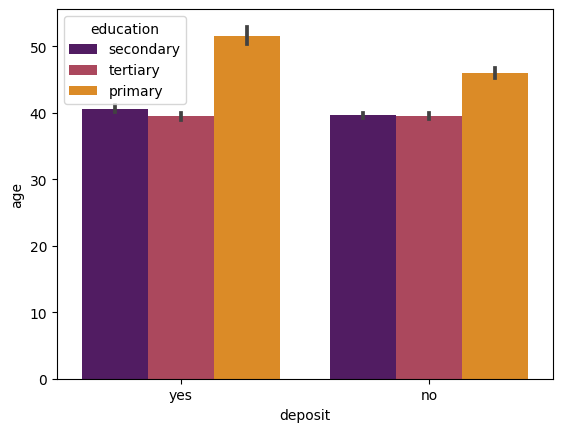

In [ ]:
sns.barplot(x='deposit',y="age",hue="education",data=df,palette='inferno')

<Axes: xlabel='loan', ylabel='age'>

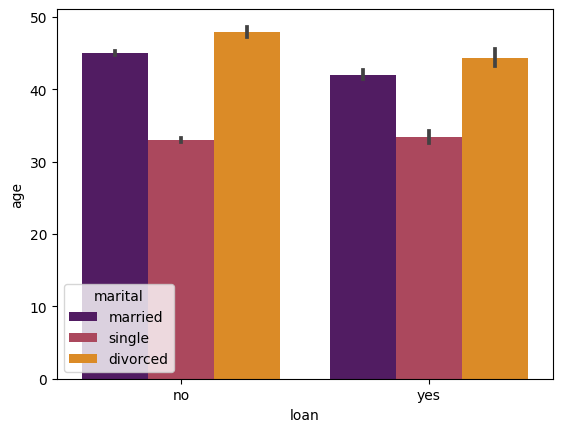

In [ ]:
sns.barplot(x='loan',y="age",hue="marital",data=df,palette='inferno')

<Axes: xlabel='loan', ylabel='age'>

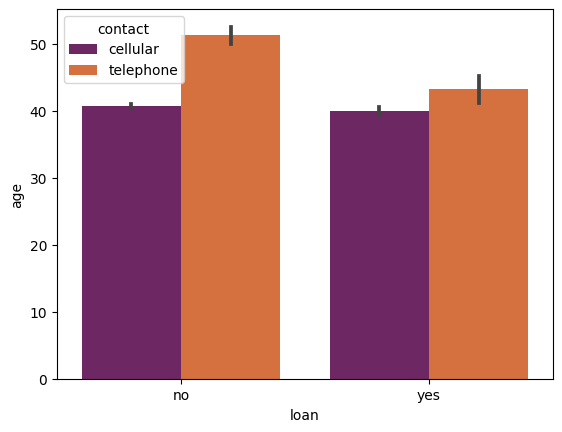

In [ ]:
sns.barplot(x='loan',y="age",hue="contact",data=df, palette='inferno')

<Axes: xlabel='deposit', ylabel='balance'>

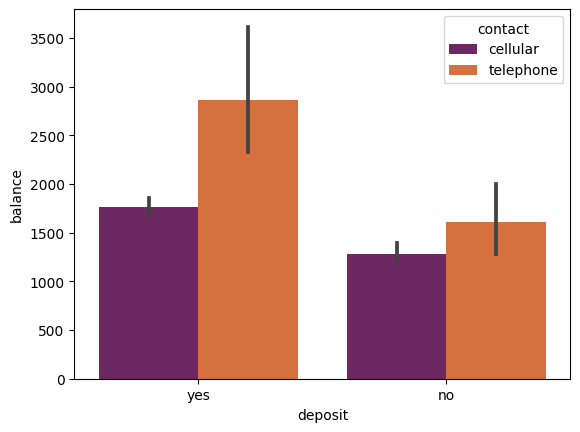

In [ ]:
sns.barplot(x='deposit',y="balance", hue='contact', data=df,palette='inferno')

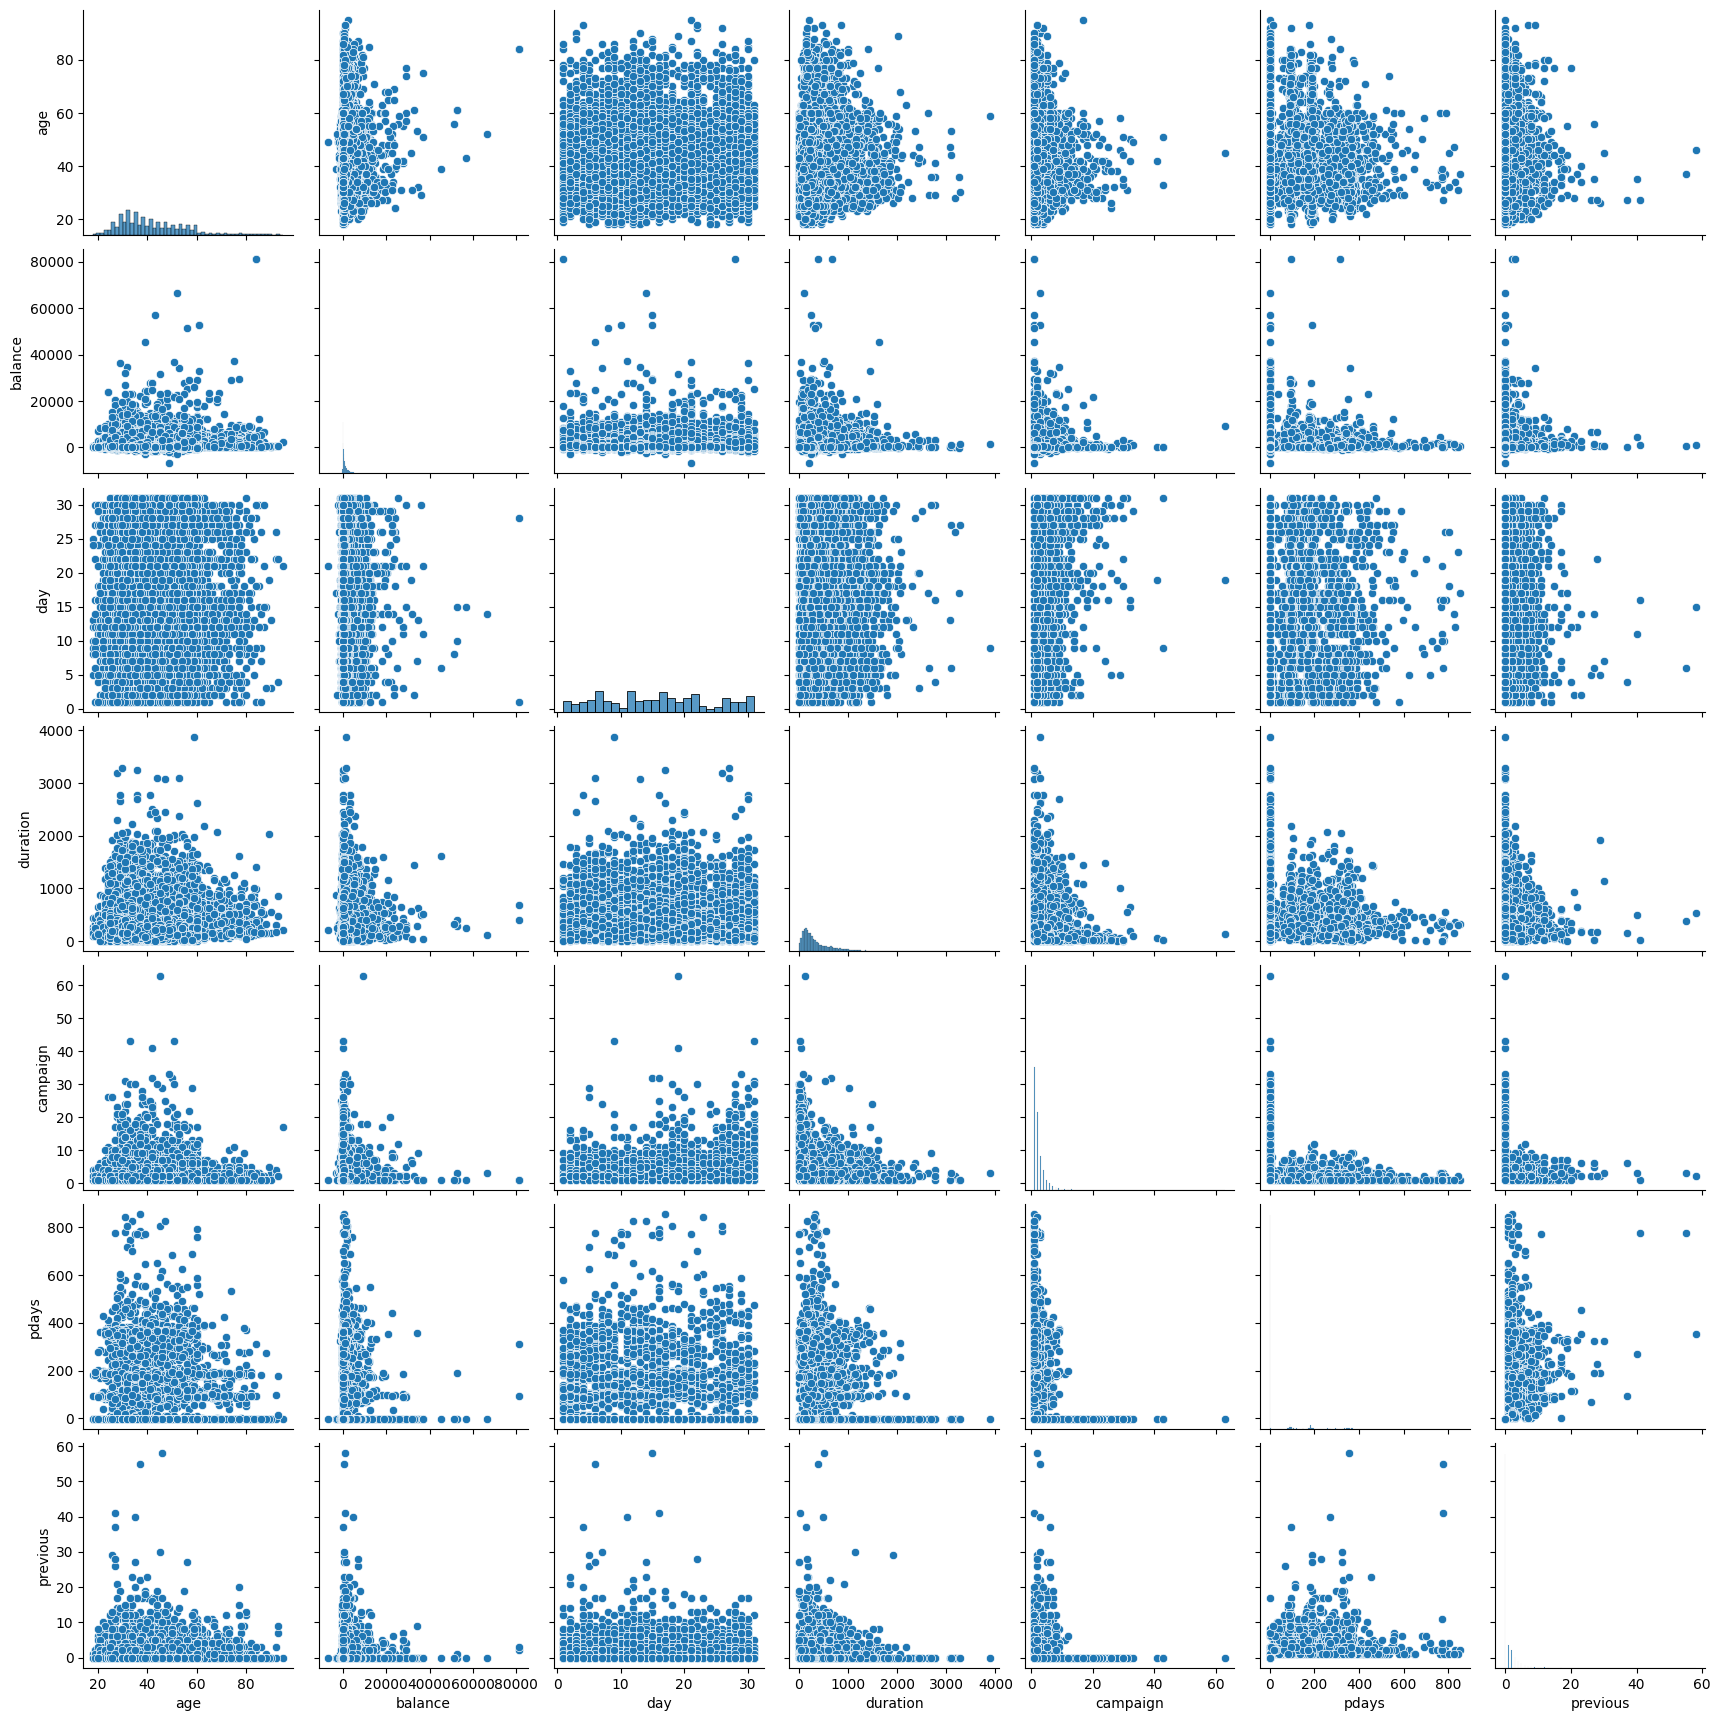

In [ ]:
#Relation Variables / Variables
#sns.pairplot(df[num_cols])
sns.pairplot(df)

<ipython-input-24-95dc3fda23be>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr(method='pearson')


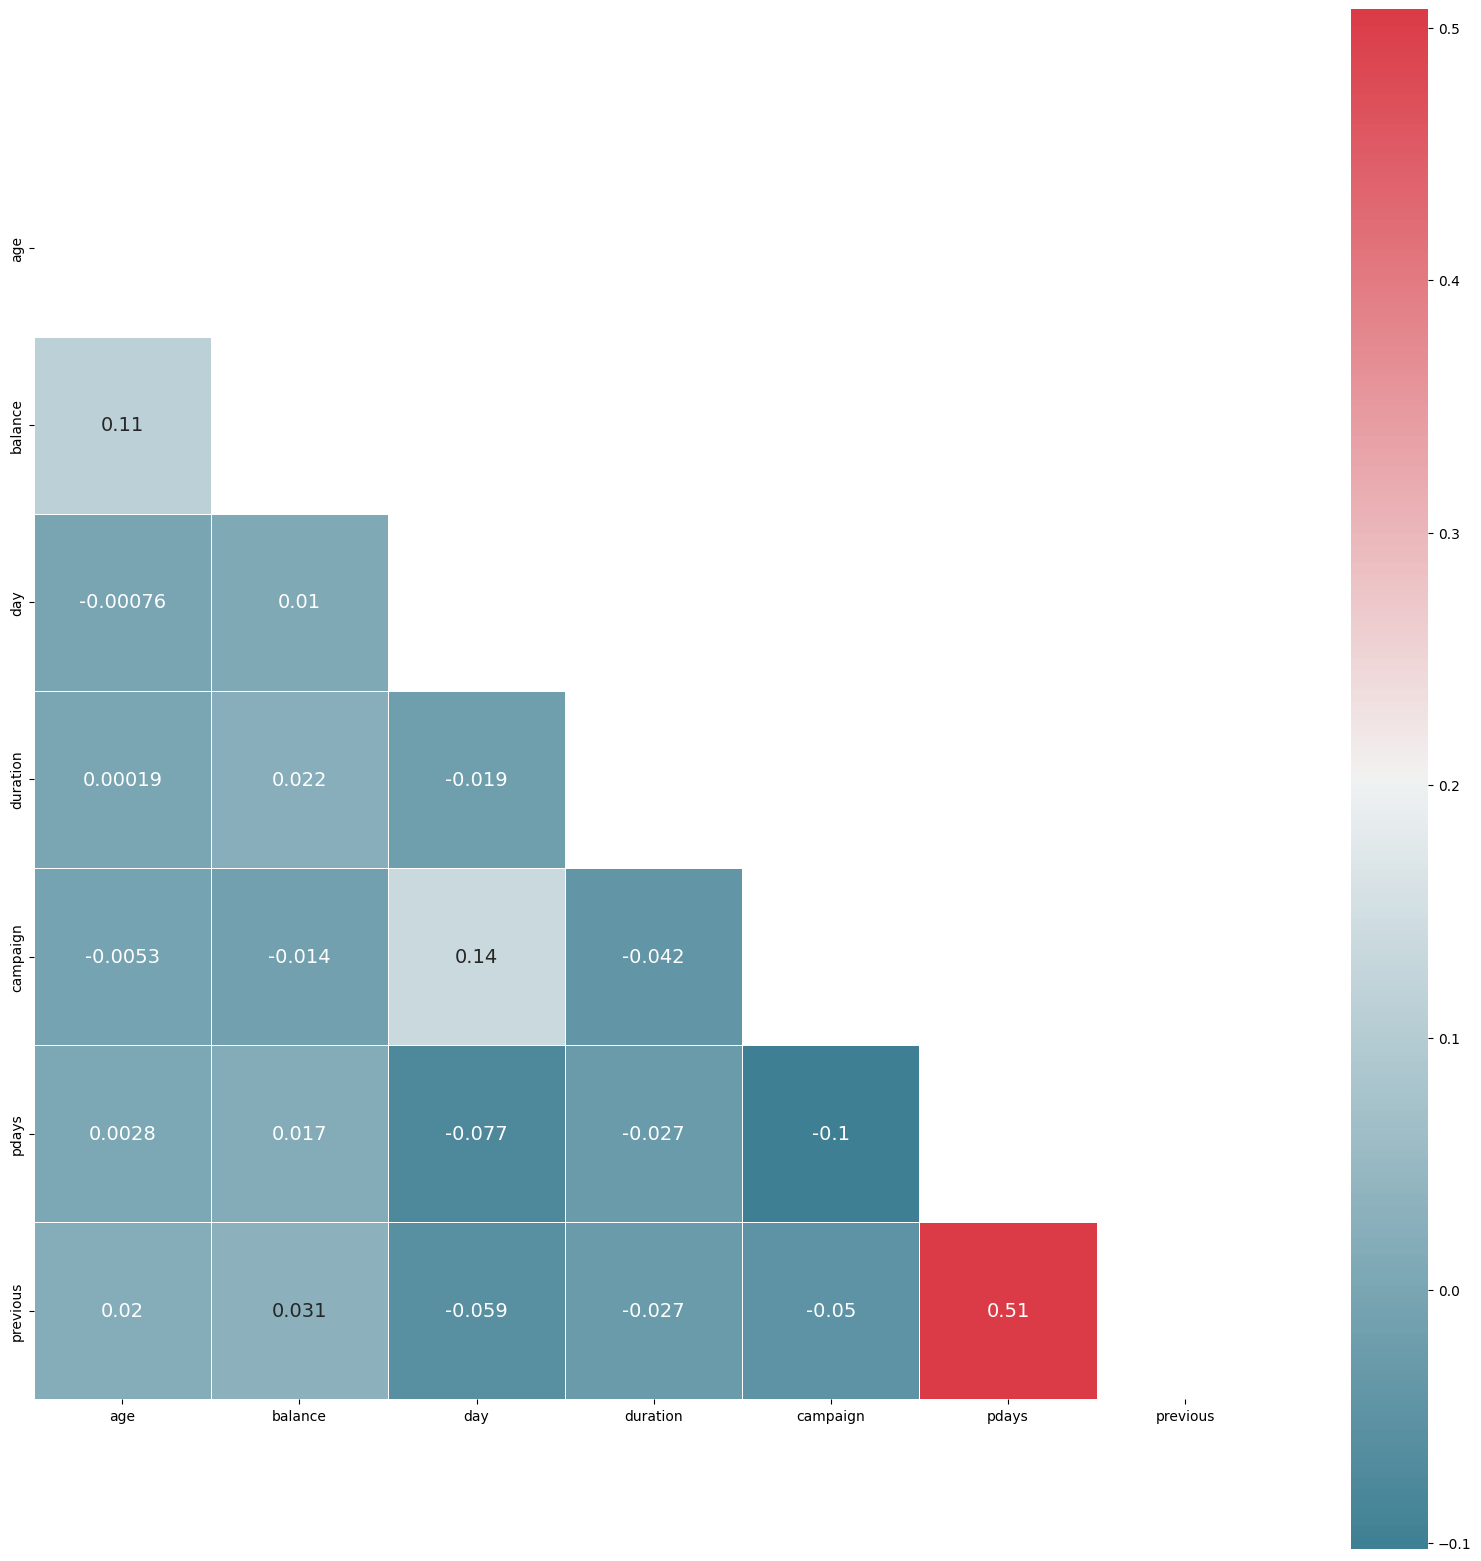

In [ ]:
#Multivariate Analysis - Correlation Between Numerical Features
# calculates the correlations
correlation = df.corr(method='pearson')

# uses the variable ax for single a Axes
fig, ax = plt.subplots()

# sets the figure size in inches
ax.figure.set_size_inches(20, 20)

# generates a mask for the upper triangle
mask = np.triu(np.ones_like(correlation, dtype=np.bool_))

# generates a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# plots the heatmap
sns.heatmap(correlation, cmap=cmap, mask=mask, square=True, linewidths=.5,
            annot=True, annot_kws={'size':14})

# displays the plot
plt.show()

Relation Target / Variables

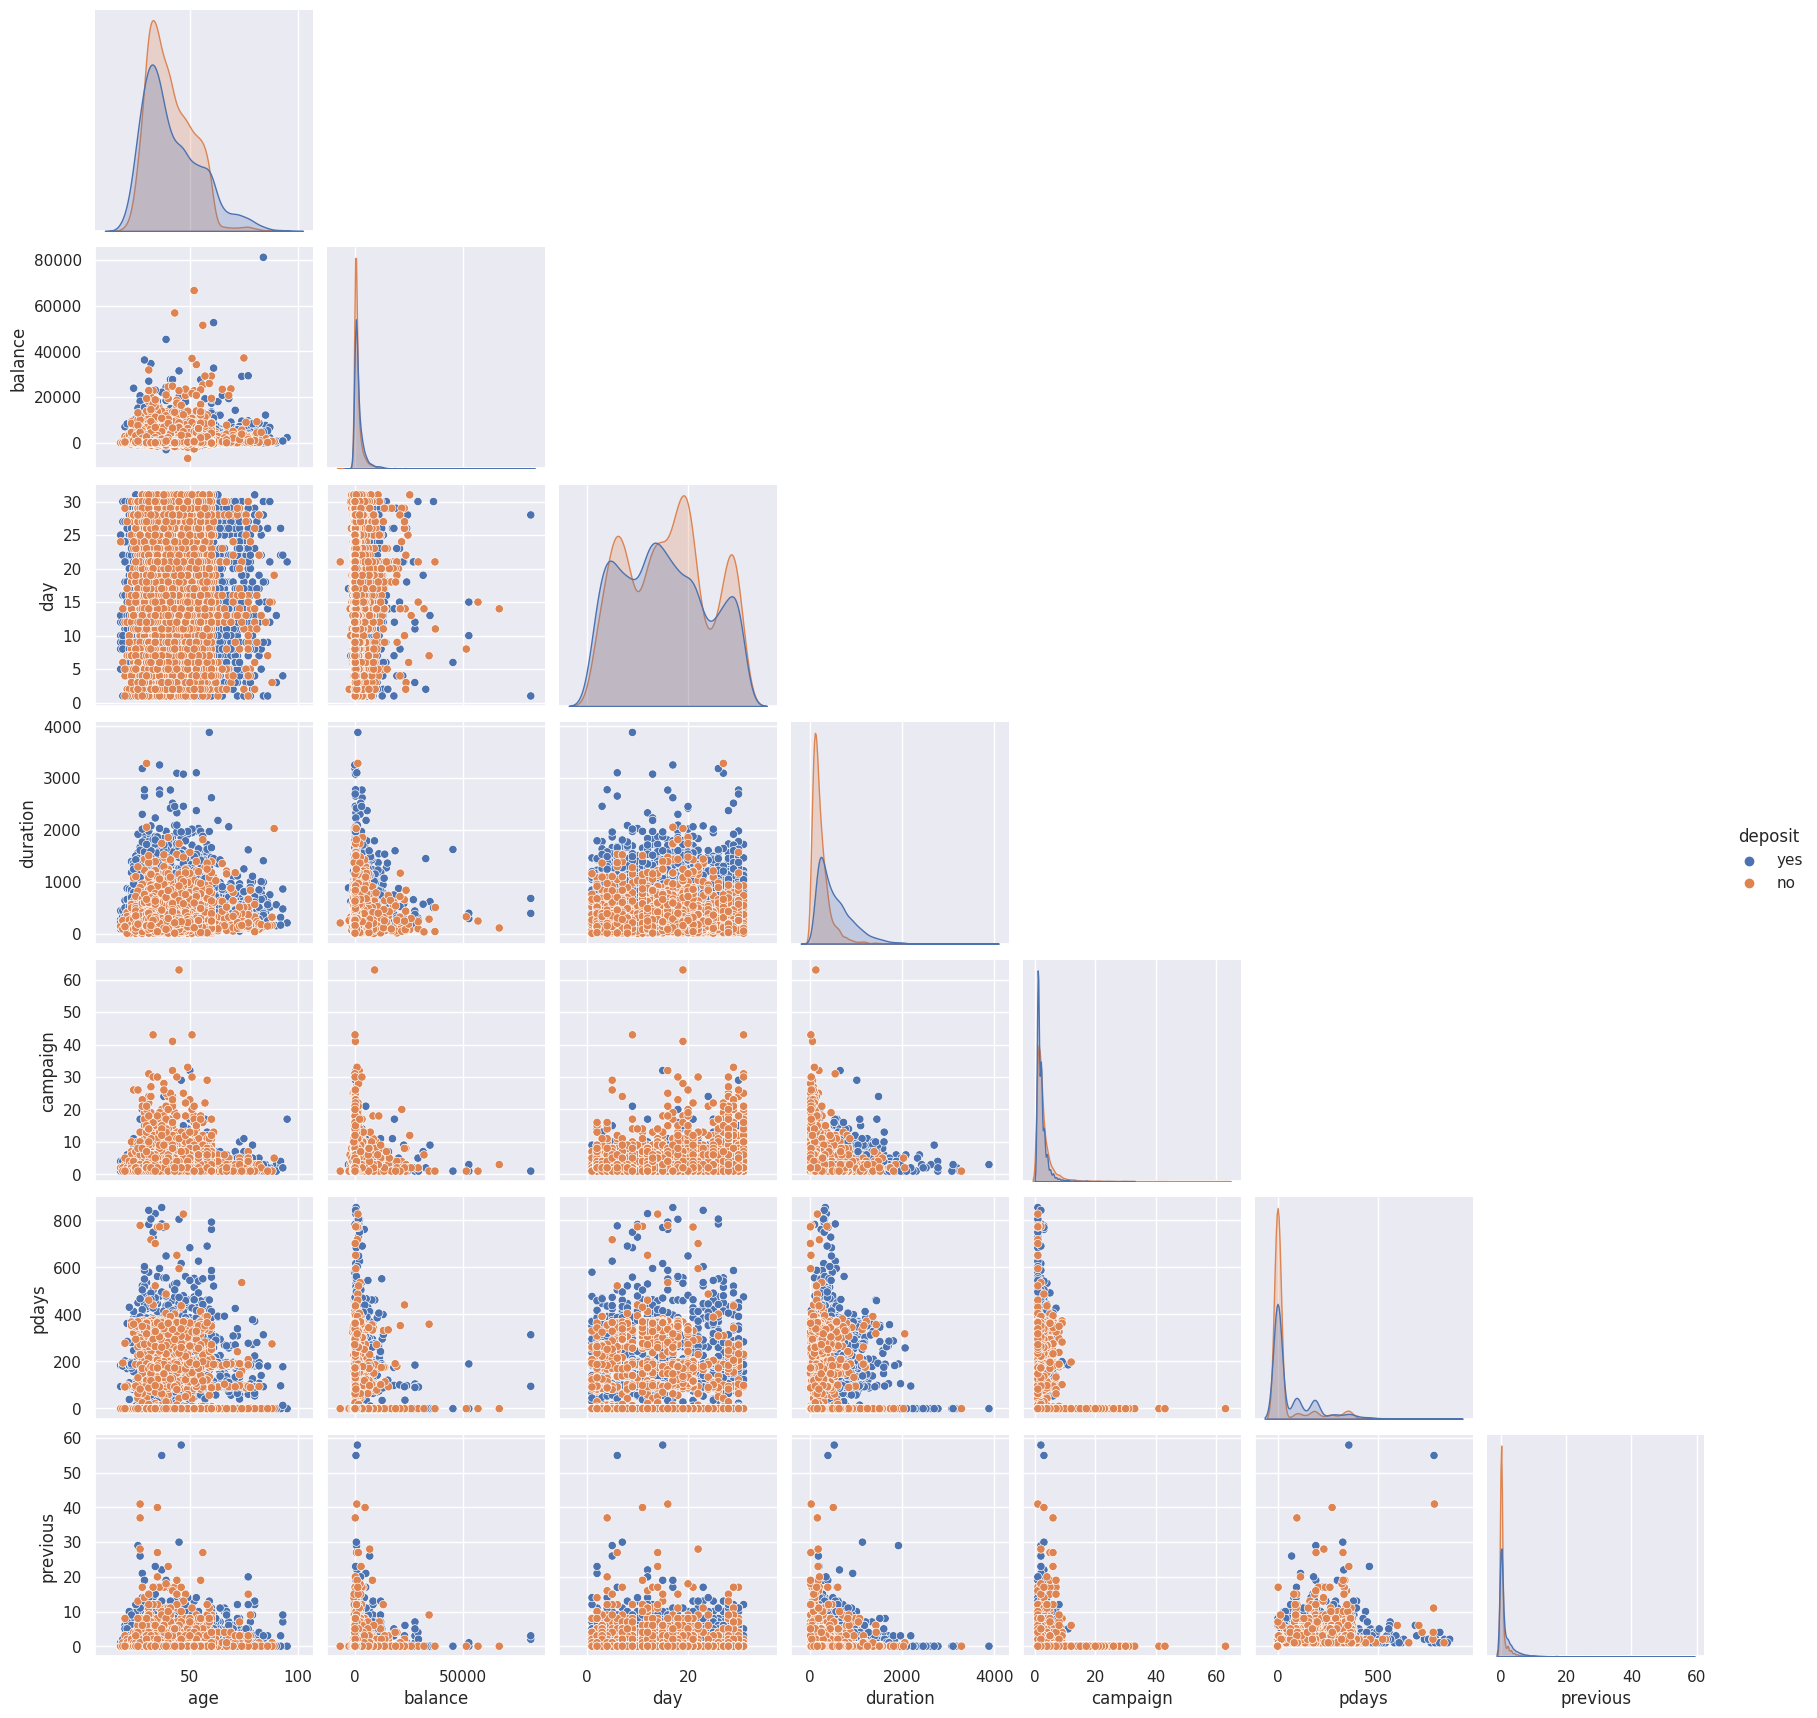

In [31]:
sns.pairplot(df, hue="deposit",corner=True)

In [32]:
deposit_df = df[df['deposit'] == 'yes']
notdeposit_df = df[df['deposit'] == 'no']

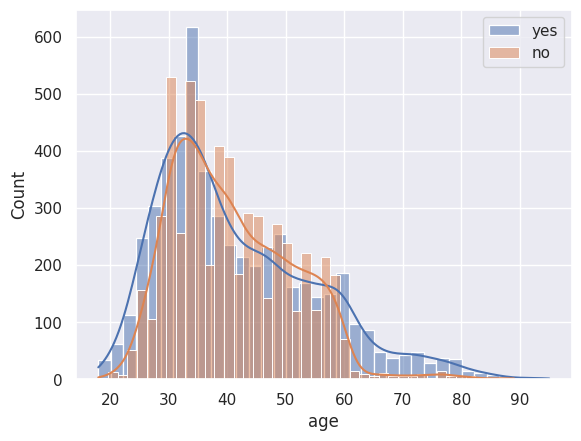

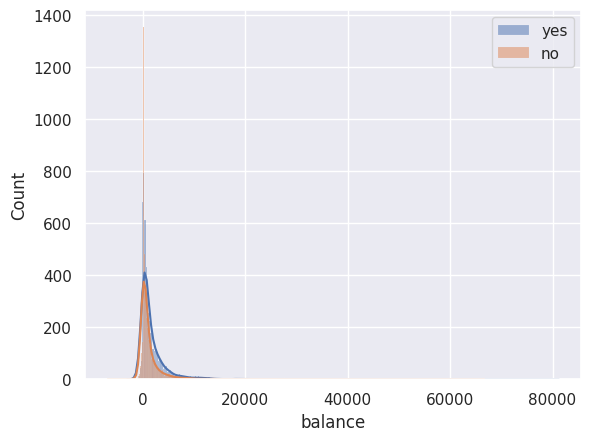

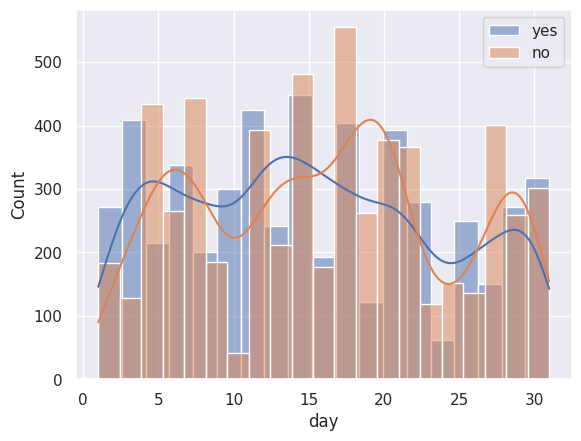

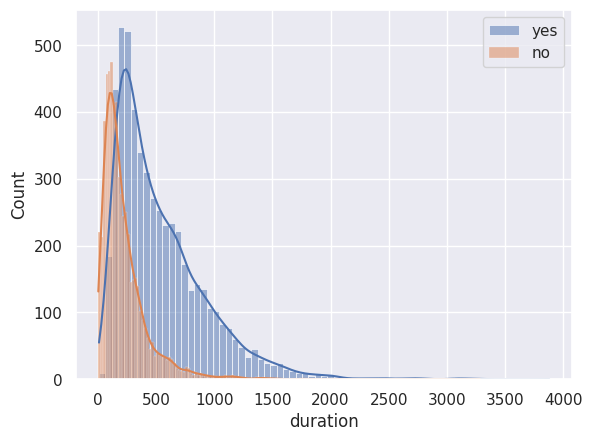

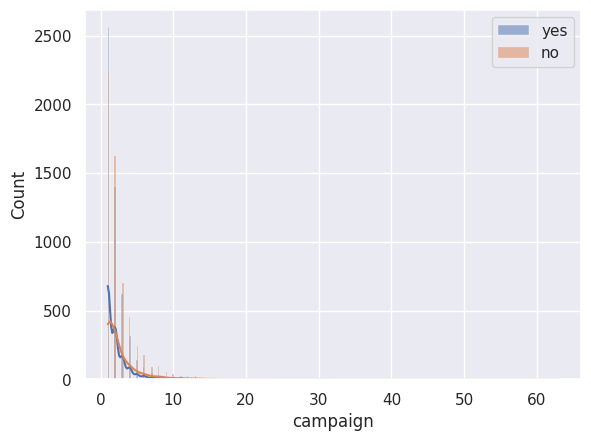

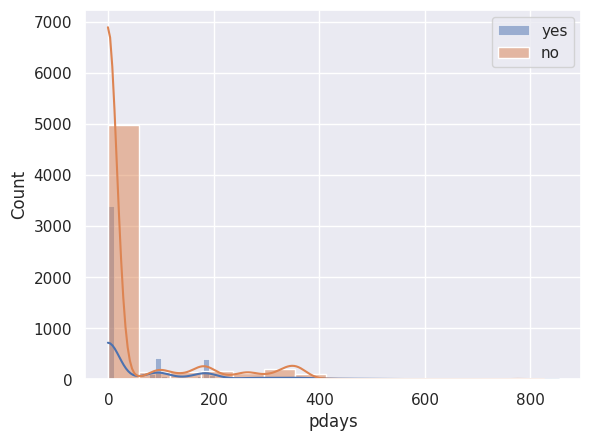

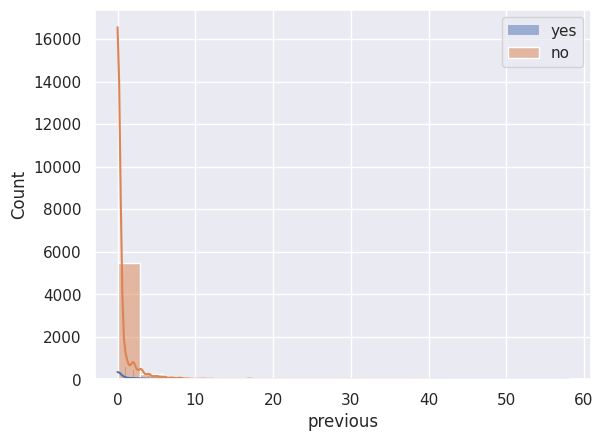

In [33]:
for col in num_cols:
    plt.figure()
    sns.histplot(deposit_df[col], label='yes',kde=True)
    sns.histplot(notdeposit_df[col], label='no',kde=True)
    plt.legend()

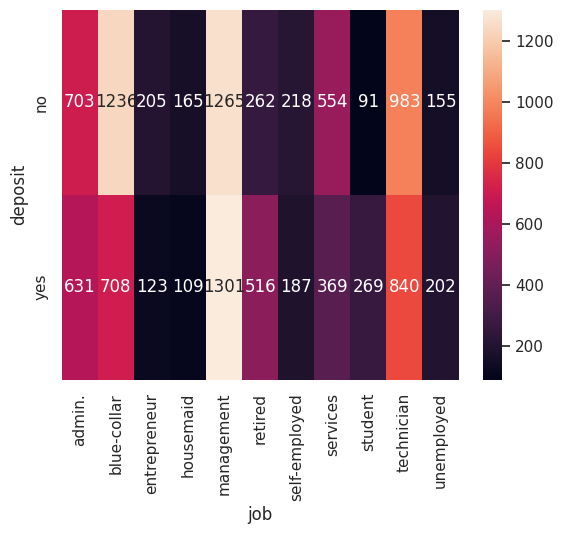

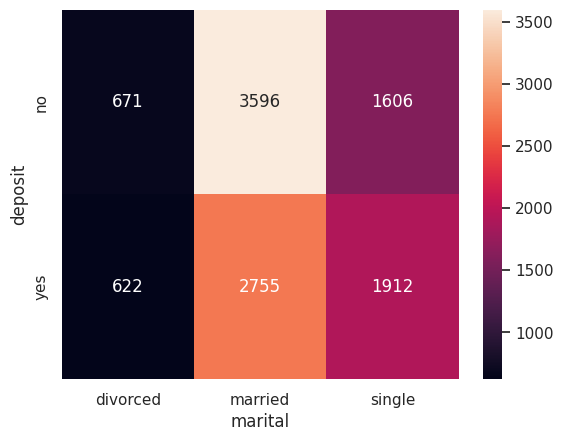

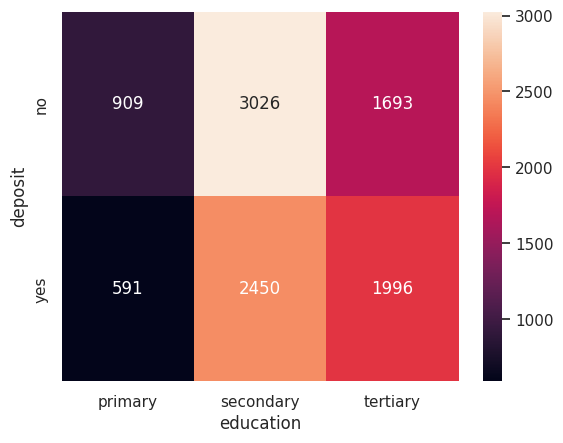

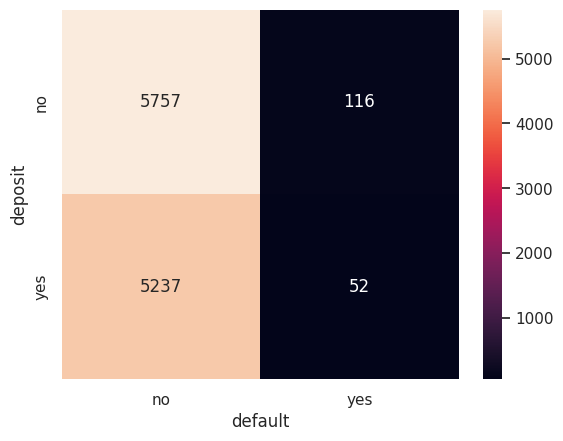

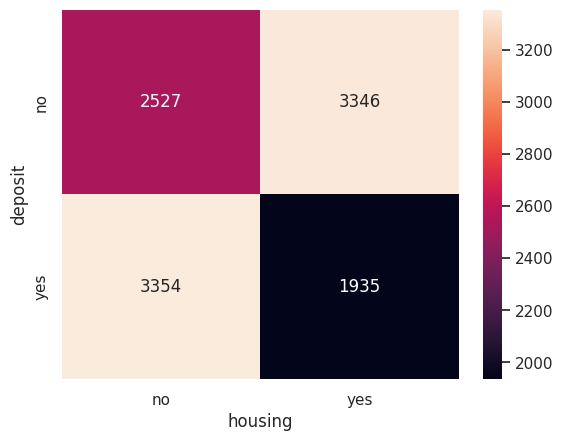

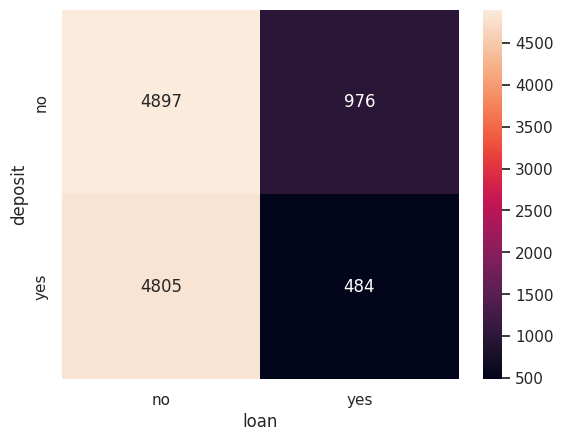

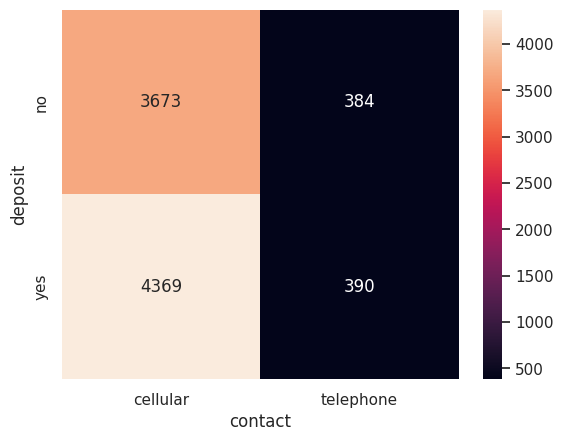

In [34]:
# Relation Target / categoricals variables
for col in cat_cols[:7]:
    plt.figure()
    sns.heatmap(pd.crosstab(df['deposit'], df[col]), annot=True, fmt='d')

In [ ]:
def plot_bar(df, feat_x, feat_y, normalize=True):
    """ Plot with vertical bars of the requested dataframe and features"""

    ct = pd.crosstab(df[feat_x], df[feat_y])
    if normalize == True:
        ct = ct.div(ct.sum(axis=1), axis=0)
    return ct.plot(kind='bar', stacked=True)

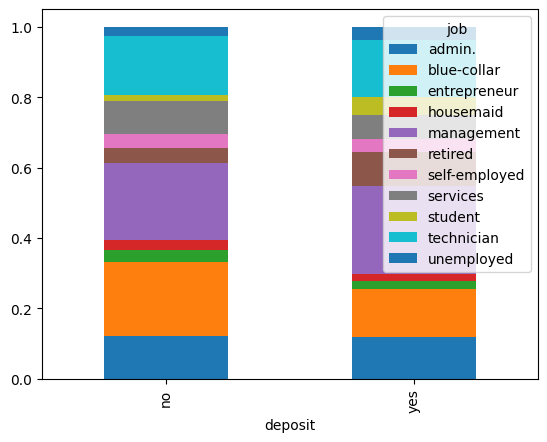

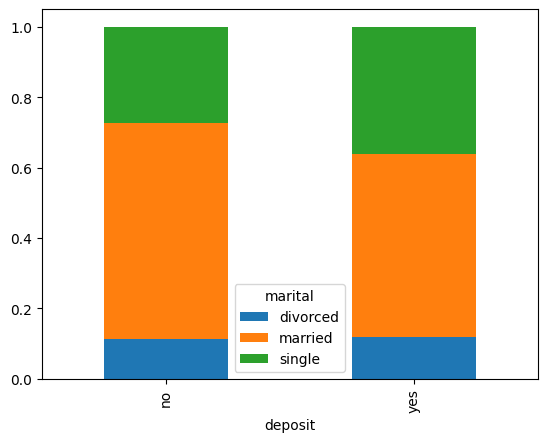

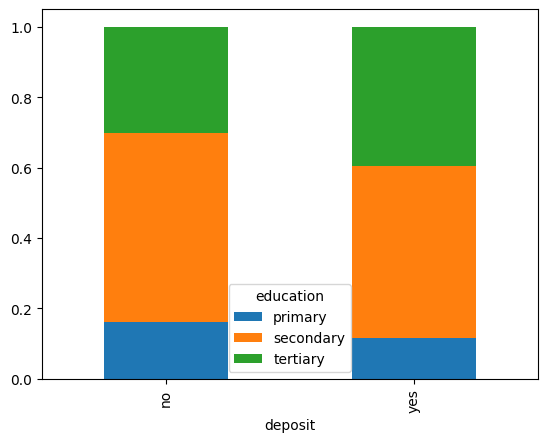

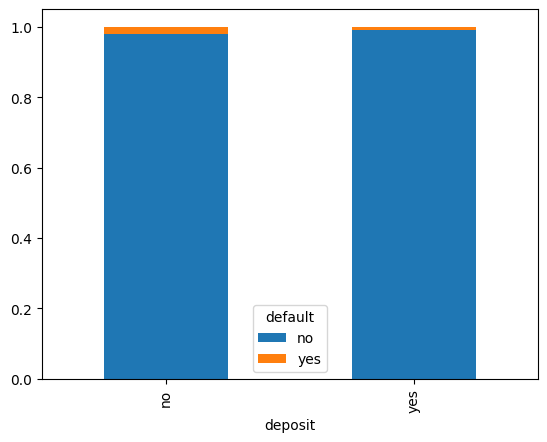

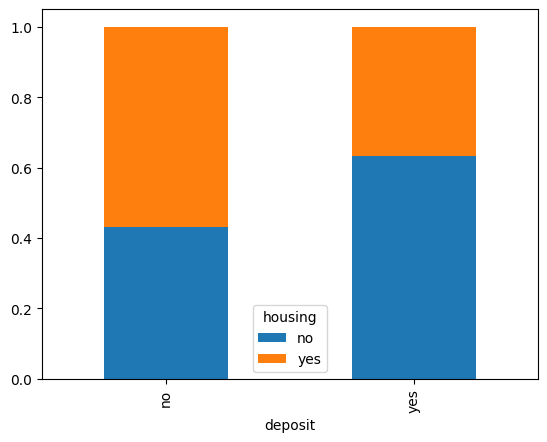

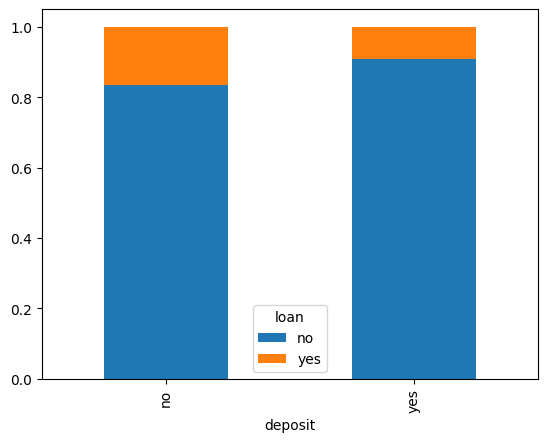

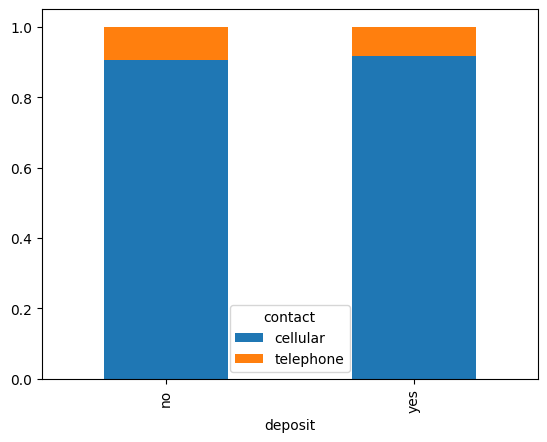

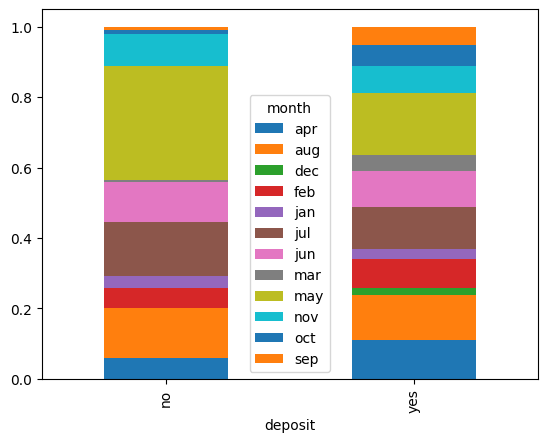

In [ ]:
ll= cat_cols[:]
ll.remove('deposit')
for c in ll:
  plot_bar(df,'deposit', c )
  plt.show()


# 2. Clean the data

##### Preprocessing

In [118]:
cleaned_df=df

In [119]:
# Drop poutcome Column ,drop irrelevant columns
cleaned_df.drop(["poutcome"],axis=1,inplace=True)
cleaned_df.drop(["pdays"],axis=1,inplace=True)


In [120]:
cat_cols, num_cols, cat_but_car = grab_col_names(cleaned_df)

In [121]:
trainset, testset = train_test_split(cleaned_df, test_size=0.25, random_state=0)

In [57]:
trainset['deposit'].value_counts()

no     4370
yes    4001
Name: deposit, dtype: int64

In [58]:
testset['deposit'].value_counts()

no     1503
yes    1288
Name: deposit, dtype: int64

In [122]:
def binary_encode(df, columns, positive_label):
    df = df.copy()
    for column in columns:
        df[column] = df[column].apply(lambda x: 1 if x == positive_label else 0)
    return df

In [123]:
def ordinal_encode(df, columns, orderings):
    df = df.copy()
    for column, ordering in zip(columns, orderings):
        df[column] = df[column].apply(lambda x: ordering.index(x) if str(x) != 'nan' else x)
    return df

In [124]:
def onehot_encode(df, columns):
    df = df.copy()
    for column in columns:
        dummies = pd.get_dummies(df[column])
        df = pd.concat([df, dummies], axis=1)
        df.drop(column, axis=1, inplace=True)
    return df

In [125]:
binary_features = ['default', 'housing', 'loan','deposit']

ordinal_features = ['education', 'month']

nominal_features = ['job', 'marital', 'contact']

In [126]:
education_ordering = ['primary', 'secondary', 'tertiary']

month_ordering = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

orderings = [education_ordering, month_ordering]

In [127]:
# Convert nominal values to binary values
#df.replace("?", np.NaN, inplace=True)
def encodage(df):
  df=binary_encode(df, binary_features, 'yes')
  df = ordinal_encode(df, ordinal_features, orderings)
  df= onehot_encode(df, nominal_features)
  return df



In [128]:
def imputation(df):
  numerical_imputation = SimpleImputer(strategy='mean')
  categorical_imputation = SimpleImputer(strategy='most_frequent')
  cat_cols, num_cols, cat_but_car = grab_col_names(df)
  df[num_cols] =numerical_imputation.fit_transform(df[num_cols])
  df[cat_cols] =categorical_imputation.fit_transform(df[cat_cols])
  return  df

In [130]:
def normalisation(df):
  scaler = StandardScaler()
  cat_cols, num_cols, cat_but_car = grab_col_names(df)
  df[num_cols] = scaler.fit_transform(df[num_cols])
  return df

In [131]:
def preprocessing(df):
  df = encodage(df)
  df = imputation(df)
  df = normalisation(df)
  X = df.drop('deposit', axis=1)
  y = df['deposit']
  print(y.value_counts())
  return X, y


In [132]:
X_train, y_train = preprocessing(trainset)

0.0    4370
1.0    4001
Name: deposit, dtype: int64


In [134]:
X_test, y_test = preprocessing(testset)

0.0    1503
1.0    1288
Name: deposit, dtype: int64


In [135]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8371, 27), (2791, 27), (8371,), (2791,))

# 3. Build a  deep learning network to predict the marketing campaign outcome ("deposit" either Yes or No)

In [136]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))  # Dropout layer with a dropout rate of 0.2
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [137]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [138]:
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
262/262 [==============================] - 2s 2ms/step - loss: 0.5141 - accuracy: 0.7594
Epoch 2/10
262/262 [==============================] - 0s 2ms/step - loss: 0.4425 - accuracy: 0.7995
Epoch 3/10
262/262 [==============================] - 0s 2ms/step - loss: 0.4334 - accuracy: 0.8046
Epoch 4/10
262/262 [==============================] - 0s 2ms/step - loss: 0.4226 - accuracy: 0.8105
Epoch 5/10
262/262 [==============================] - 1s 2ms/step - loss: 0.4117 - accuracy: 0.8158
Epoch 6/10
262/262 [==============================] - 0s 2ms/step - loss: 0.4109 - accuracy: 0.8138
Epoch 7/10
262/262 [==============================] - 0s 2ms/step - loss: 0.4028 - accuracy: 0.8208
Epoch 8/10
262/262 [==============================] - 0s 2ms/step - loss: 0.3957 - accuracy: 0.8301
Epoch 9/10
262/262 [==============================] - 0s 2ms/step - loss: 0.3972 - accuracy: 0.8220
Epoch 10/10
262/262 [==============================] - 0s 2ms/step - loss: 0.3934 - accuracy: 0.8271

In [139]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

Test Loss: 0.413373738527298
Test Accuracy: 0.816911518573761


In [140]:
y_test_predicted = model.predict(X_test).round()
y_test_predicted

88/88 [==============================] - 0s 2ms/step


array([[0.],
       [1.],
       [0.],
       ...,
       [0.],
       [0.],
       [1.]], dtype=float32)

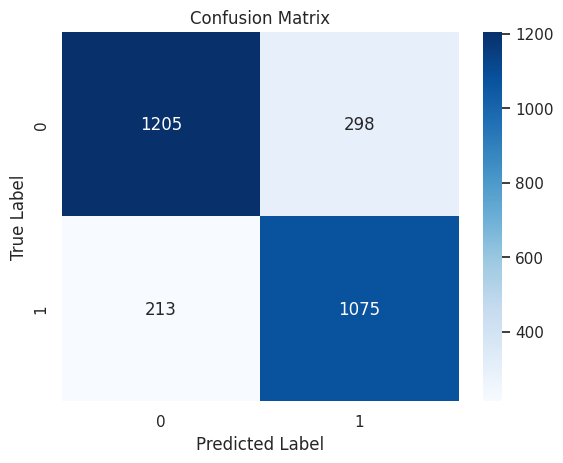

In [142]:
sns.heatmap(confusion_matrix(y_test, y_test_predicted), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()